In [5]:
# Creates a map from the EQSGMIM catalogue of all events in the CSV file

import pygmt
import pandas as pd
import numpy as np
import os
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import datetime
from scipy.stats import norm
import scipy.stats as ss
from math import lgamma
import matplotlib.pyplot as plt
from matplotlib import rc
rc("pdf",fonttype=42)

output_dir = '../output/IM_catalogue'
fig_dir = 'Figures'

os.chdir(output_dir)

In [6]:
gm_data = pd.read_csv('Tables/ground_motion_im_table_rotd50.csv',low_memory=False)
sta_data = pd.read_csv('Tables/site_table.csv',low_memory=False)
sta_data.loc[sta_data.basin.isnull(),'basin'] = 'No basin'
data = pd.read_csv('Tables/earthquake_source_table.csv')


In [7]:
# Set longitudes to be all positive
data.loc[data.lon < 0, 'lon'] = 360 + data.lon[data.lon < 0]
data = data[(data.lon < 190) & (data.lon >155)]
data = data[(data.lat < -15)]

# Set the region for the plot to be slightly larger than the data bounds.
region = [
    data.lon.min() - 1,
    data.lon.max() + 1,
    -55,
    data['lat'].max() + 1,
]

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="viridis",
              reverse=True,
              series=[data.depth.min(),data.depth.max()])
fig.plot(x=data.lon, 
         y=data['lat'],
         size=0.05 * 1.5 ** data.mag,
         style="cc",
         fill=data.depth,
         cmap=True,
         pen="black")
fig.colorbar(frame='af+l"Depth (km)"')
with fig.inset(position="jTL+w3c/6c+o0.2c", margin=0, box=True):
    fig.basemap(region=[0, 3, 0, 6], projection="X3c/6c", frame=True)
    mag_circles = np.array([[0.5, 5, 0.05 * 1.5 ** 1],
                    [0.5225, 4.375, 0.05 * 1.5 ** 2],
                    [0.53375, 3.75, 0.05 * 1.5 ** 3],
                    [0.55063, 3.125, 0.05 * 1.5 ** 4],
                    [0.57594, 2.5, 0.05 * 1.5 ** 5],
                    [0.61391, 1.875, 0.05 * 1.5 ** 6],
                    [0.67086, 1.25, 0.05 * 1.5 ** 7],
                    [0.75629, .625, 0.05 * 1.5 ** 8]])   
    text_array = np.array([[2, 5, '1'],
                    [2, 4.375, '2'],
                    [2, 3.75, '3'],
                    [2, 3.125, '4'],
                    [2, 2.5, '5'],
                    [2, 1.875, '6'],
                    [2, 1.25, '7'],
                    [2, .625, '8']])
    fig.plot(data=mag_circles,style='cc',fill='white',pen='black')
    fig.text(text='Magnitude',x=0.5,y=5.5,justify='LB',font='14p')
    for vals in text_array:
        fig.text(text=str(vals[2]),x=float(vals[0]),y=float(vals[1]),font='14p')
fig.savefig('eq_locations.pdf')
fig.show()

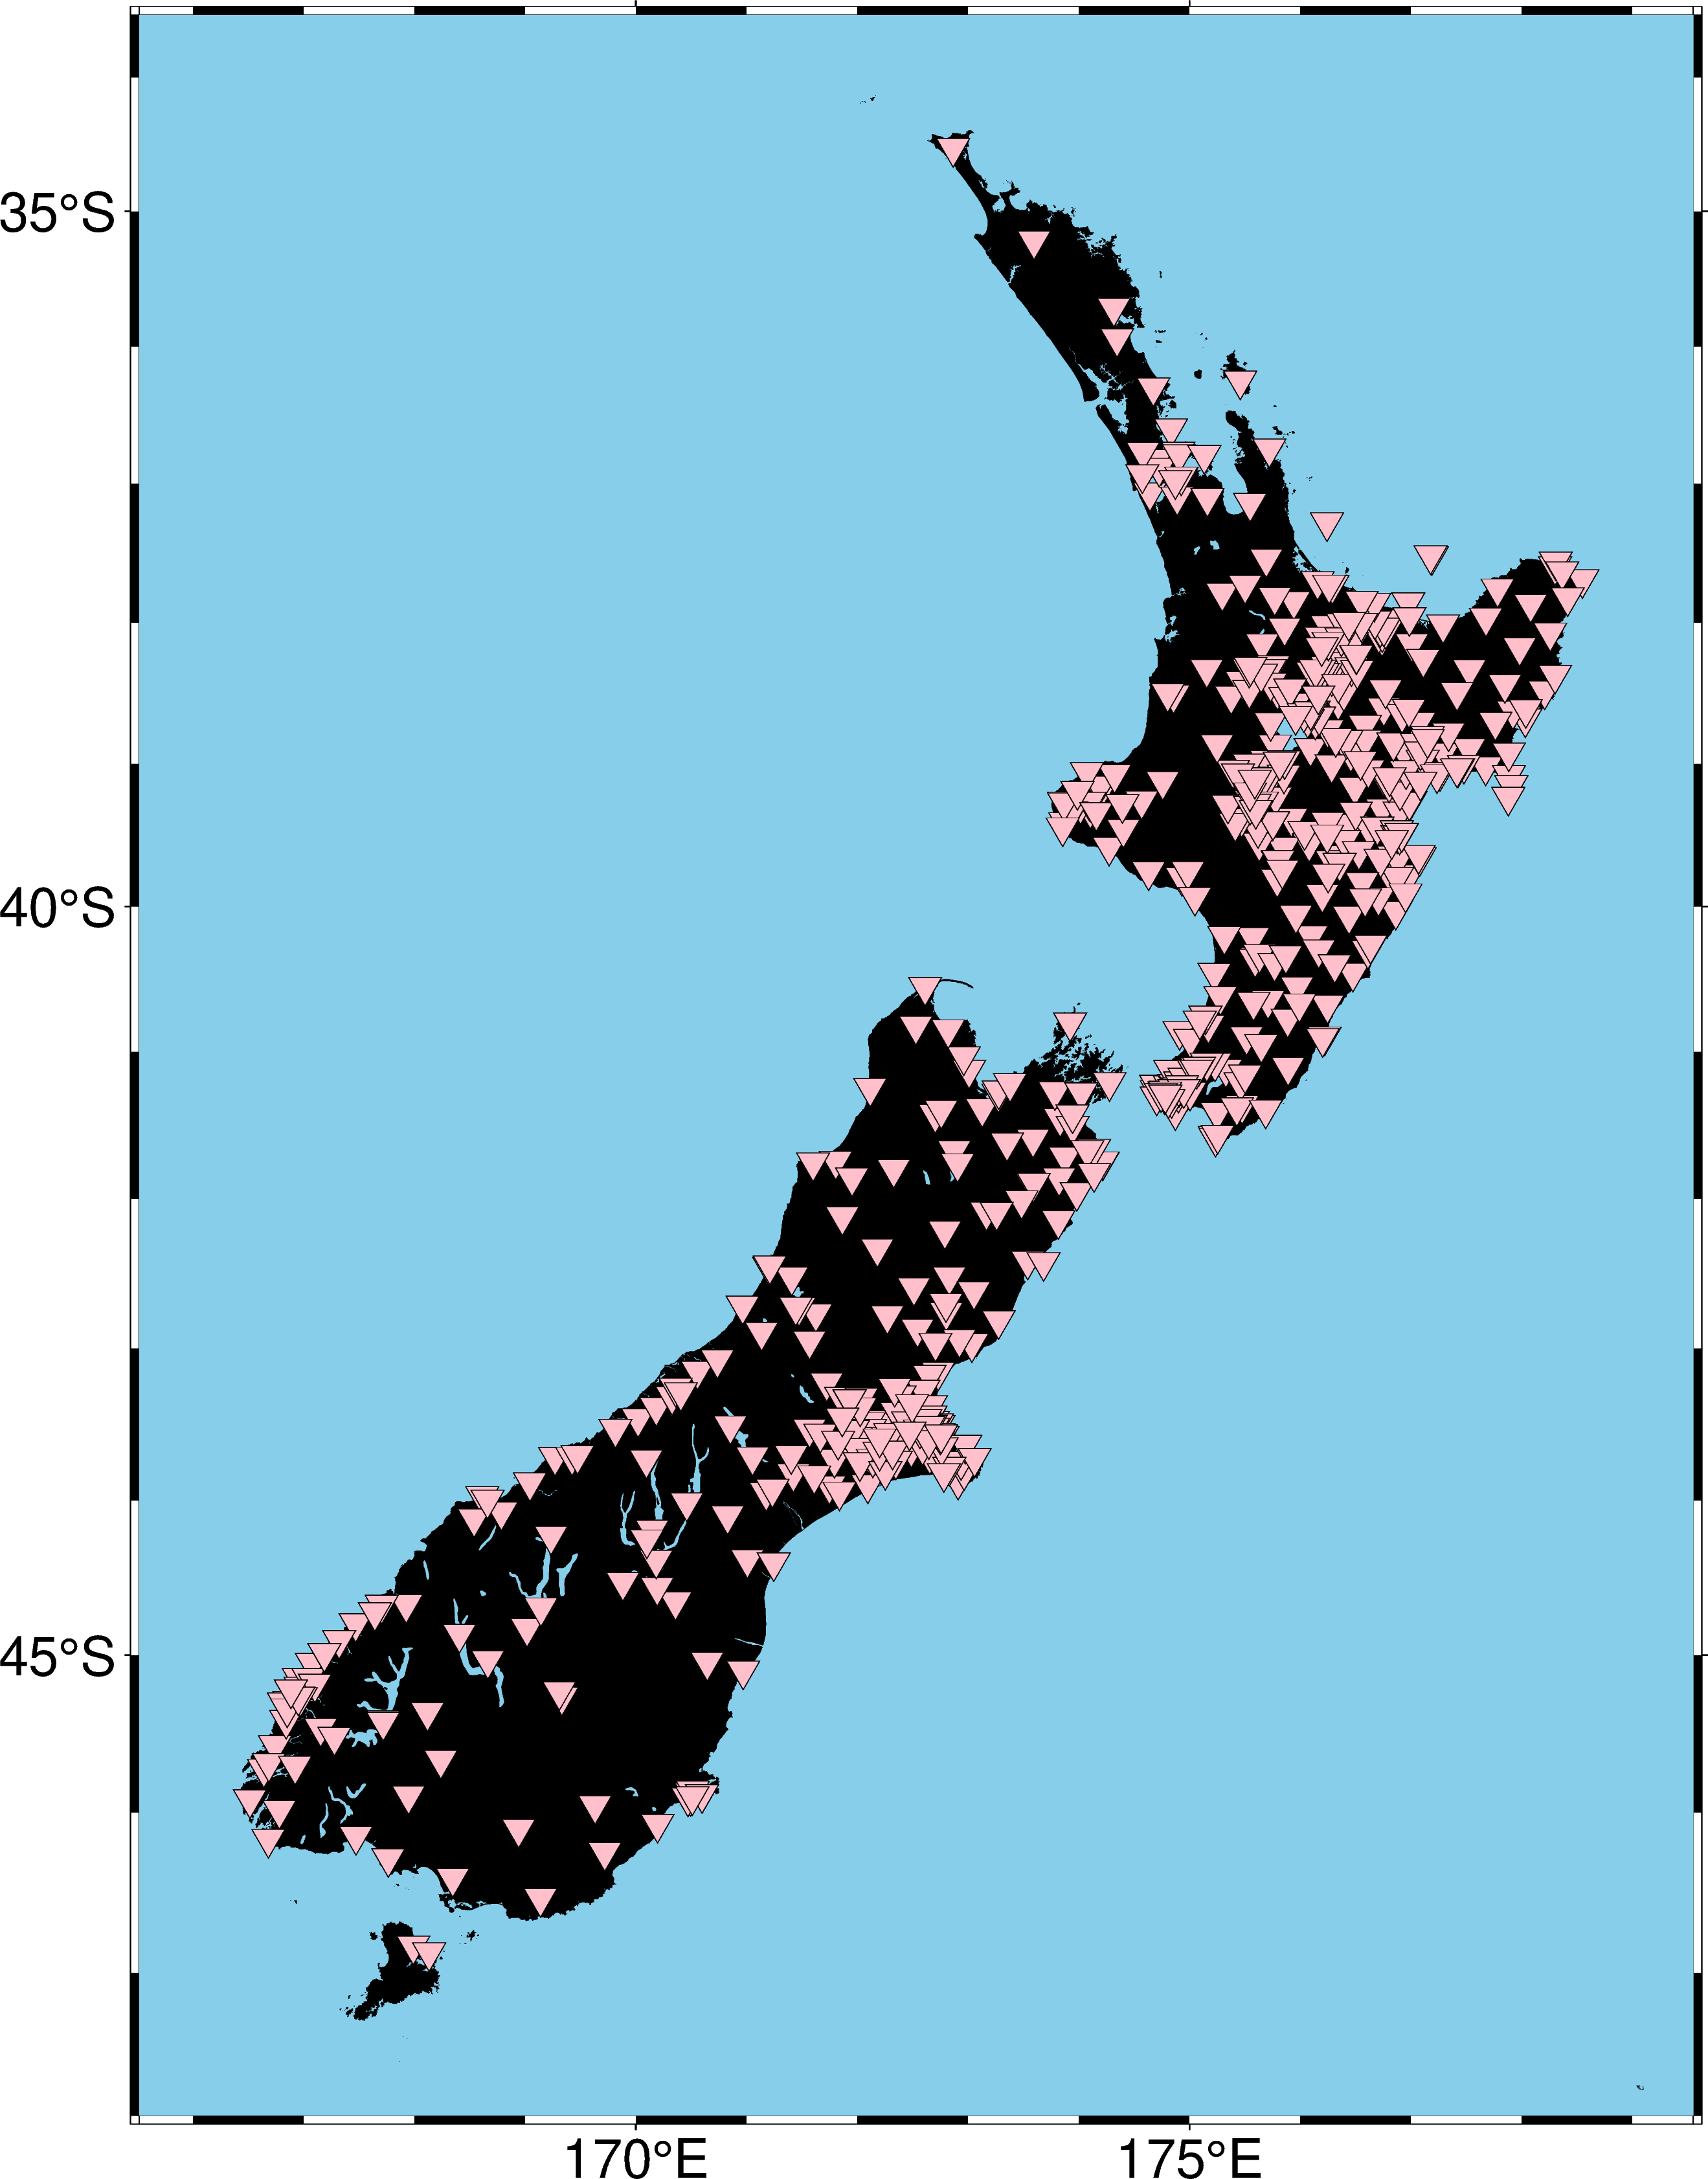

In [8]:
# Set longitudes to be all positive
sta_data.loc[sta_data.lon < 0, 'lon'] = 360 + sta_data.lon[sta_data.lon < 0]
sta_data = sta_data[(sta_data.lon < 190) & (sta_data.lon >155)]
sta_data = sta_data[(sta_data.lat < -15)]

region = [
    sta_data.lon.min() - 1,
    sta_data.lon.max() + 1,
    sta_data['lat'].min() - 1,
    sta_data['lat'].max() + 1,
]

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')

fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="black", water="skyblue")
# pygmt.makecpt(cmap="viridis",
#               reverse=True,
#               series=[sta_data.depth.min(),sta_data.depth.max()])
fig.plot(x=sta_data.lon, 
         y=sta_data['lat'],
         style="i0.5c",
         fill="pink",
         pen="black")
fig.savefig('sta_locations.pdf')
fig.show()

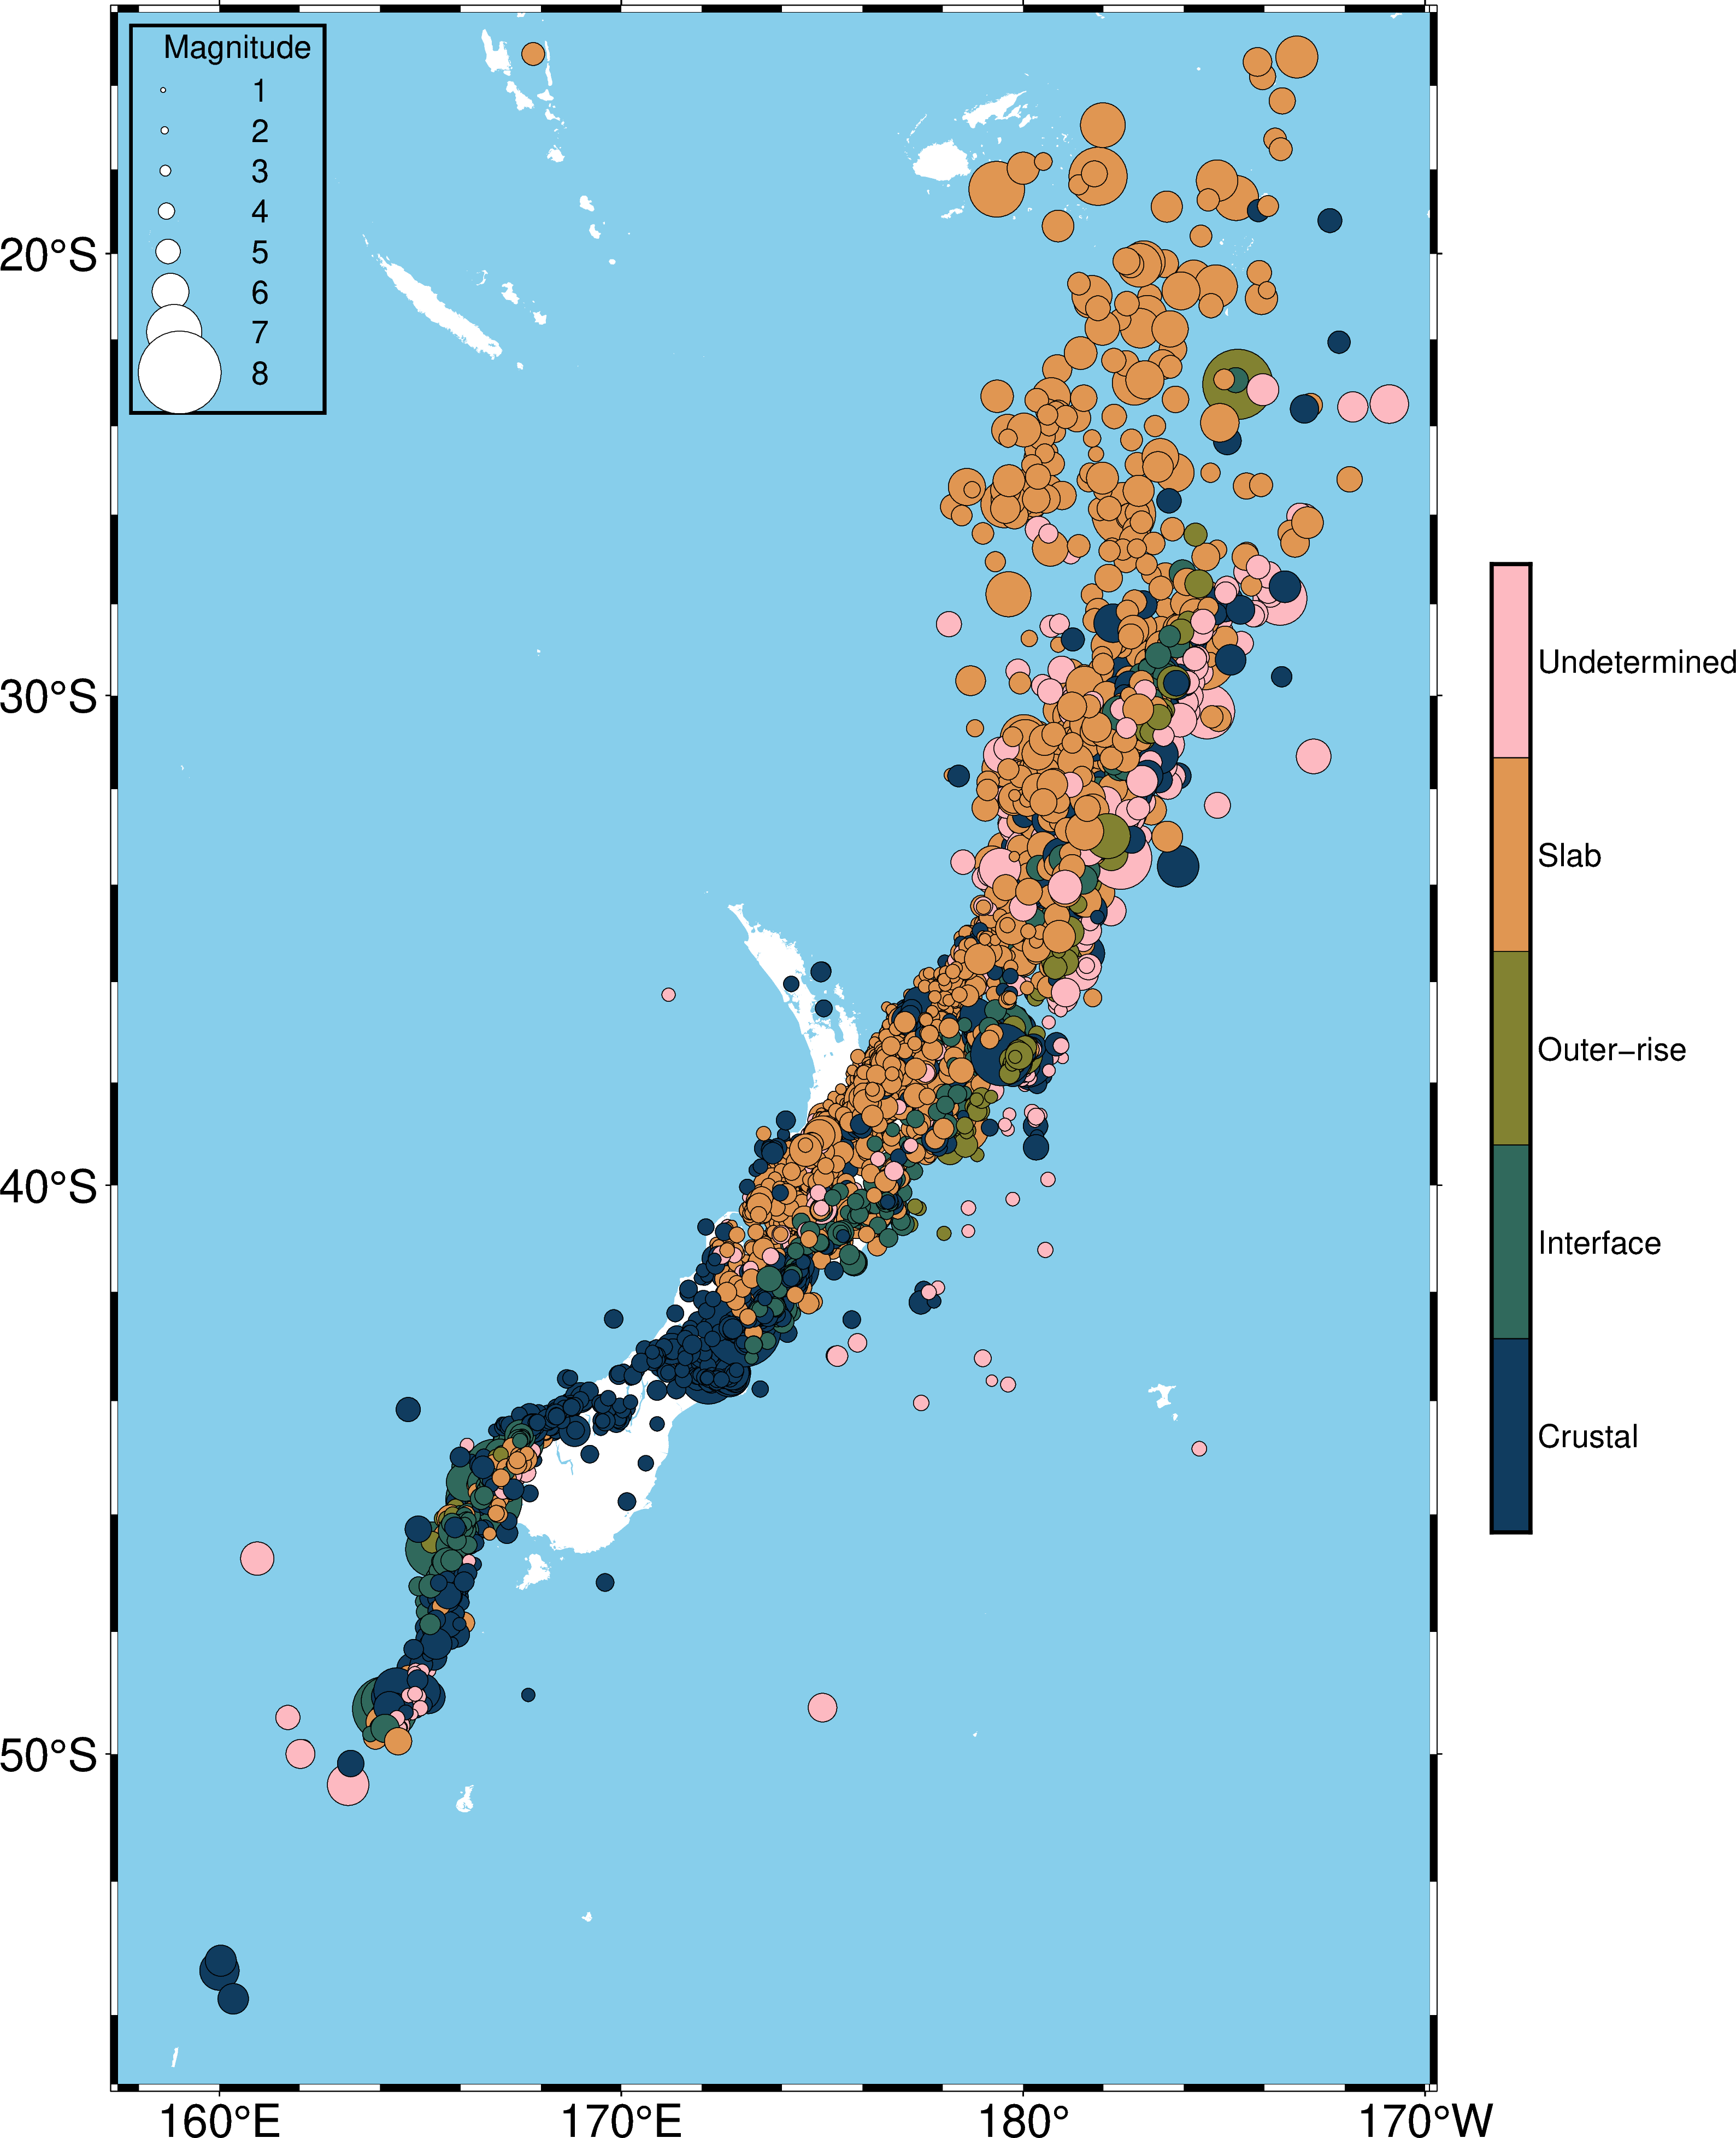

In [ ]:
# Set the region for the plot to be slightly larger than the data bounds.
region = [
    data.lon.min() - 1,
    data.lon.max() + 1,
    -55,
    data['lat'].max() + 1,
]

fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="white", water="skyblue")
data['tect_class'] = data.tect_class.astype(dtype='category')
cb_annots = list(data.tect_class.cat.categories)
pygmt.makecpt(cmap="batlow", 
    series=(data.tect_class.cat.codes.min(), data.tect_class.cat.codes.max(), 1),
    color_model="+c" + ",".join(cb_annots), 
)

fig.plot(x=data.lon, 
         y=data.lat,
         size=0.05 * 1.5 ** data.mag,
         style="cc",
         fill=data.tect_class.cat.codes.astype(int),
         cmap=True,
         pen="black")
with pygmt.config(FONT_ANNOT=14):
    fig.colorbar(position='JMR+w15c')
with fig.inset(position="jTL+w3c/6c+o0.2c", margin=0, box=True):
    fig.basemap(region=[0, 3, 0, 6], projection="X3c/6c", frame=True)
    mag_circles = np.array([[0.5, 5, 0.05 * 1.5 ** 1],
                    [0.5225, 4.375, 0.05 * 1.5 ** 2],
                    [0.53375, 3.75, 0.05 * 1.5 ** 3],
                    [0.55063, 3.125, 0.05 * 1.5 ** 4],
                    [0.57594, 2.5, 0.05 * 1.5 ** 5],
                    [0.61391, 1.875, 0.05 * 1.5 ** 6],
                    [0.67086, 1.25, 0.05 * 1.5 ** 7],
                    [0.75629, .625, 0.05 * 1.5 ** 8]])   
    text_array = np.array([[2, 5, '1'],
                    [2, 4.375, '2'],
                    [2, 3.75, '3'],
                    [2, 3.125, '4'],
                    [2, 2.5, '5'],
                    [2, 1.875, '6'],
                    [2, 1.25, '7'],
                    [2, .625, '8']])
    fig.plot(data=mag_circles,style='cc',fill='white',pen='black')
    fig.text(text='Magnitude',x=0.5,y=5.5,justify='LB',font='14p')
    for vals in text_array:
        fig.text(text=str(vals[2]),x=float(vals[0]),y=float(vals[1]),font='14p')
fig.savefig('tect_class_locations.pdf')
fig.show()

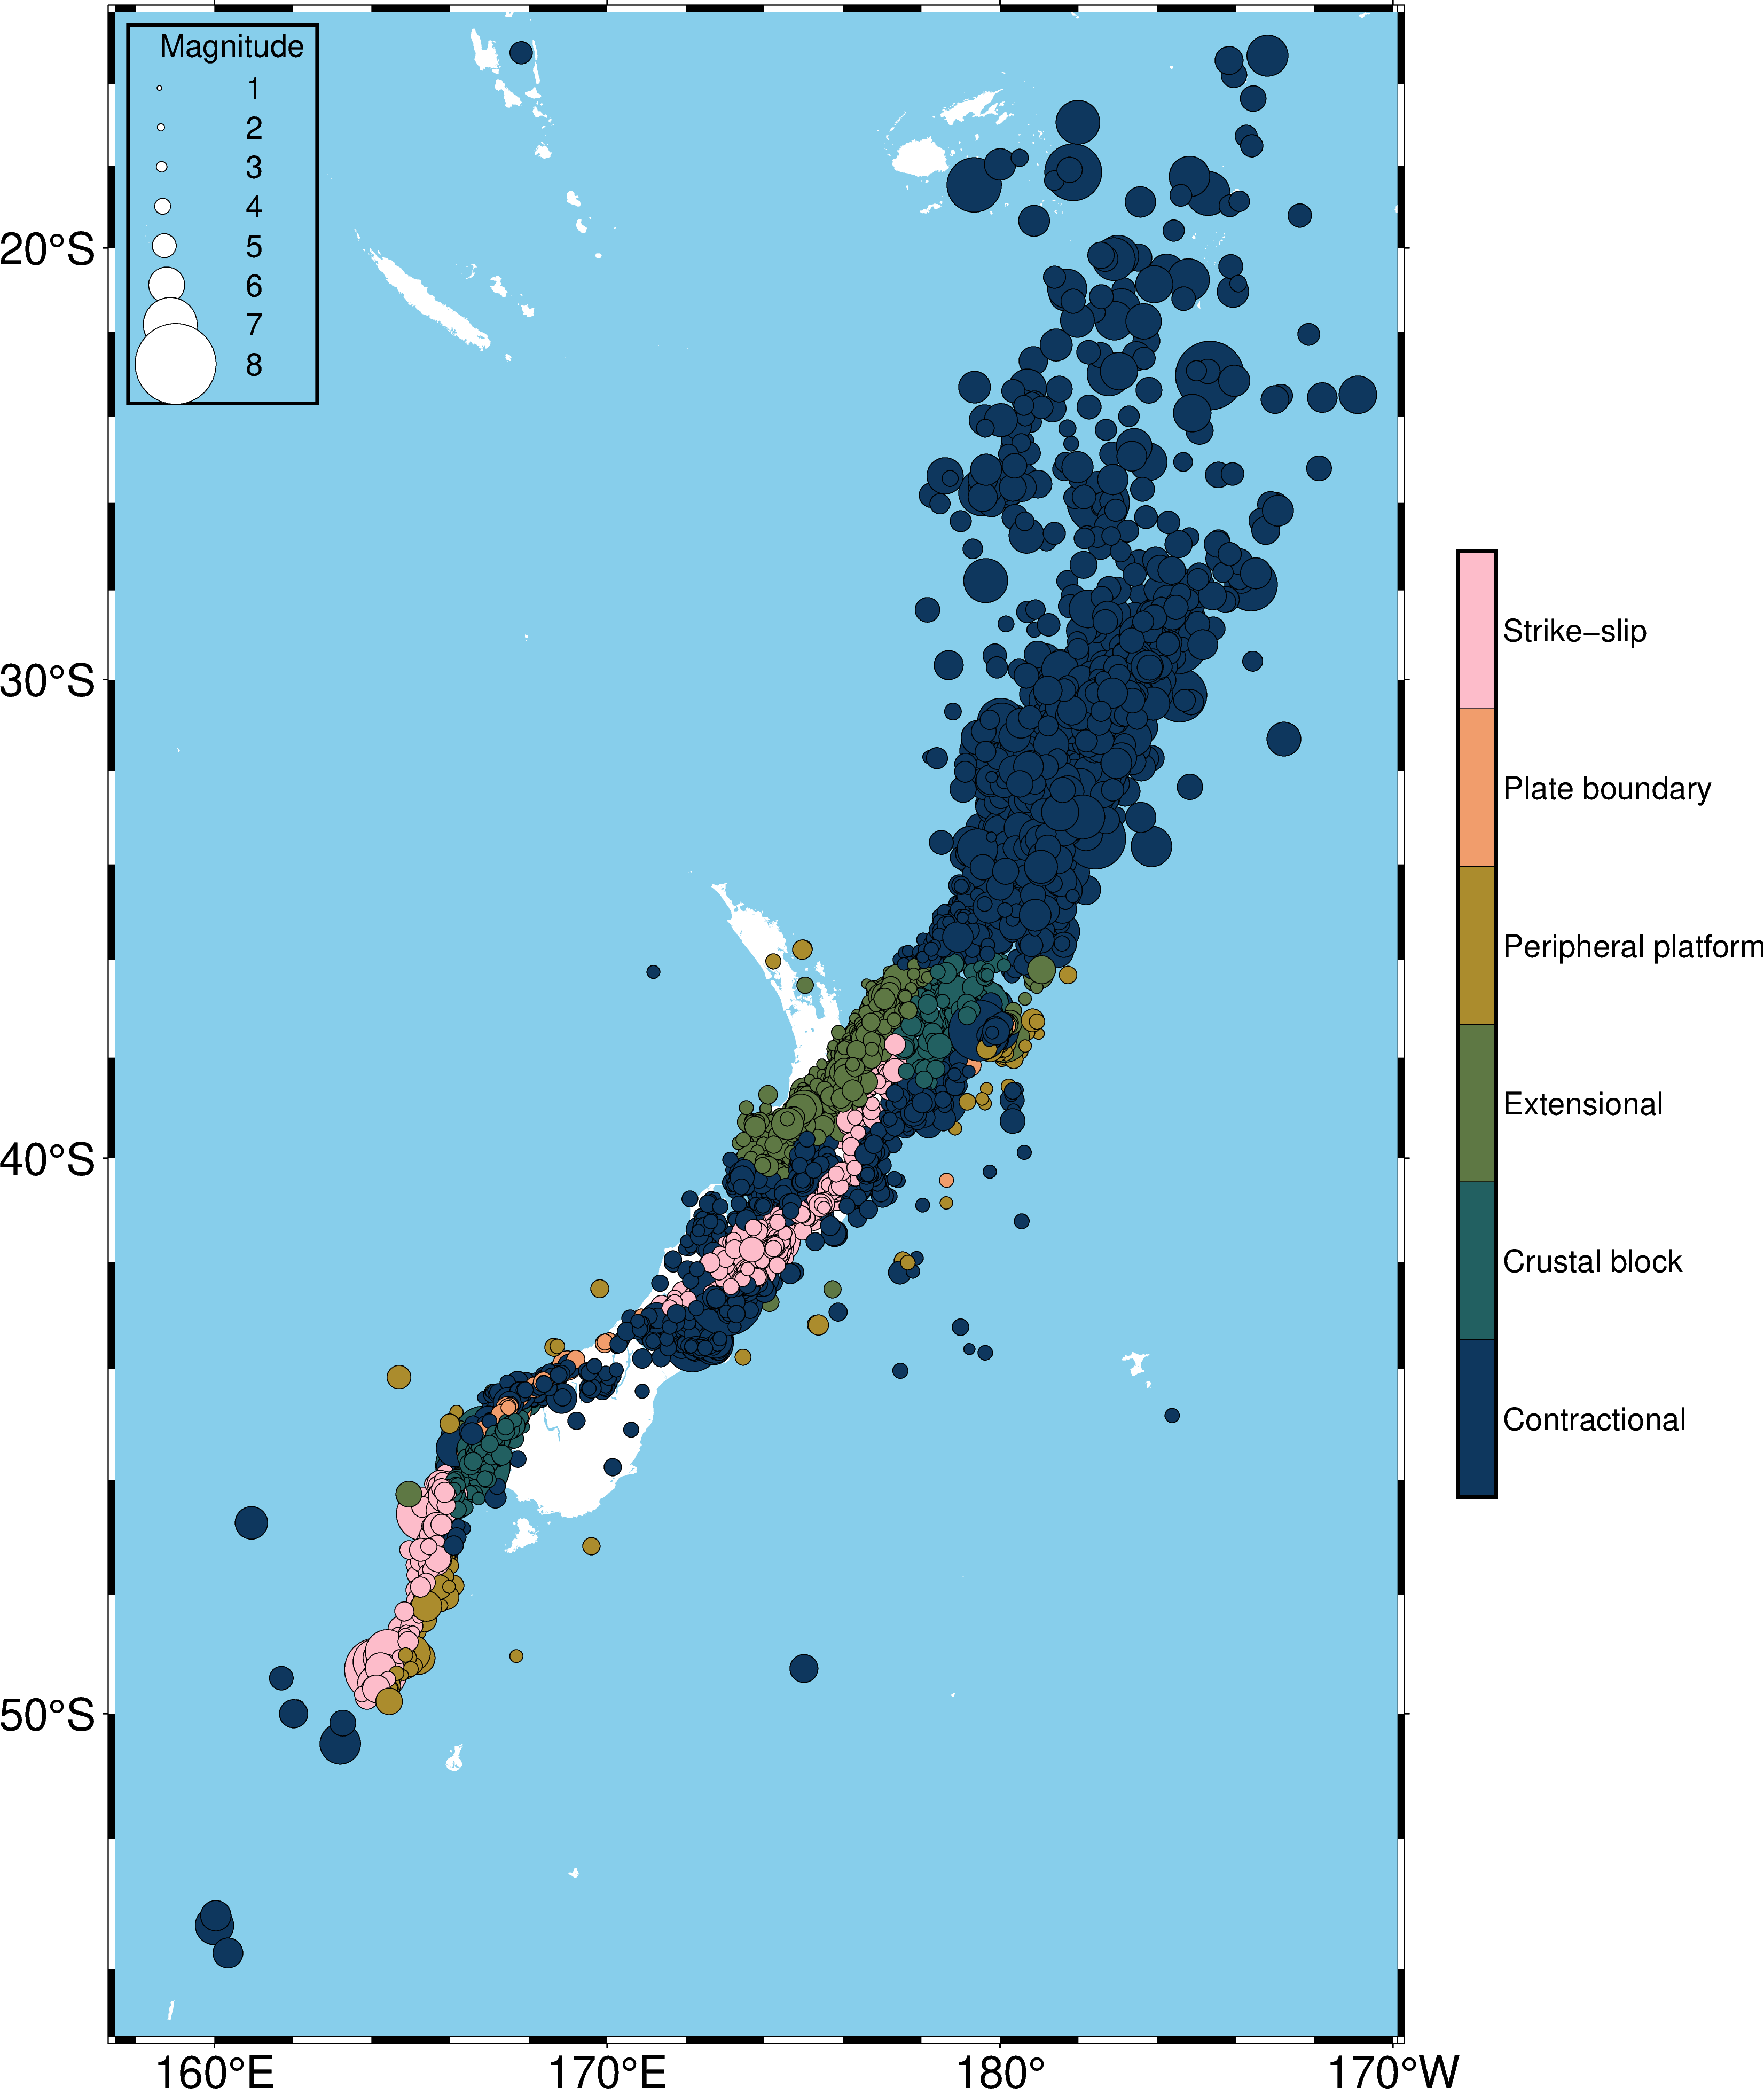

In [10]:
fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="white", water="skyblue")
# Set nan domain type values to contractional
data.loc[data['domain_type'].isnull(),'domain_type'] = 'Contractional'
data['domain_type'] = data.domain_type.astype(dtype='category')
cb_annots = list(data.domain_type.cat.categories)
# cb_annots = list(['Contraction','Crustal block','Extension','Peripheral','Plate bound','Strike-slip'])
pygmt.makecpt(cmap="batlow", 
    series=(data.domain_type.cat.codes.min(), data.domain_type.cat.codes.max(), 1),
    color_model="+c" + ",".join(cb_annots), 
)
fig.plot(x=data.lon, 
         y=data.lat,
         size=0.05 * 1.5 ** data.mag,
         style="cc",
         fill=data.domain_type.cat.codes.astype(int),
         cmap=True,
         pen="black")
with pygmt.config(FONT_ANNOT=14):
    fig.colorbar(position='JMR+w15c')
with fig.inset(position="jTL+w3c/6c+o0.2c", margin=0, box=True):
    fig.basemap(region=[0, 3, 0, 6], projection="X3c/6c", frame=True)
    mag_circles = np.array([[0.5, 5, 0.05 * 1.5 ** 1],
                    [0.5225, 4.375, 0.05 * 1.5 ** 2],
                    [0.53375, 3.75, 0.05 * 1.5 ** 3],
                    [0.55063, 3.125, 0.05 * 1.5 ** 4],
                    [0.57594, 2.5, 0.05 * 1.5 ** 5],
                    [0.61391, 1.875, 0.05 * 1.5 ** 6],
                    [0.67086, 1.25, 0.05 * 1.5 ** 7],
                    [0.75629, .625, 0.05 * 1.5 ** 8]])   
    text_array = np.array([[2, 5, '1'],
                    [2, 4.375, '2'],
                    [2, 3.75, '3'],
                    [2, 3.125, '4'],
                    [2, 2.5, '5'],
                    [2, 1.875, '6'],
                    [2, 1.25, '7'],
                    [2, .625, '8']])
    fig.plot(data=mag_circles,style='cc',fill='white',pen='black')
    fig.text(text='Magnitude',x=0.5,y=5.5,justify='LB', font='14p')
    for vals in text_array:
        fig.text(text=str(vals[2]),x=float(vals[0]),y=float(vals[1]), font='14p')
fig.savefig('domain_type_locations.pdf')
fig.show()

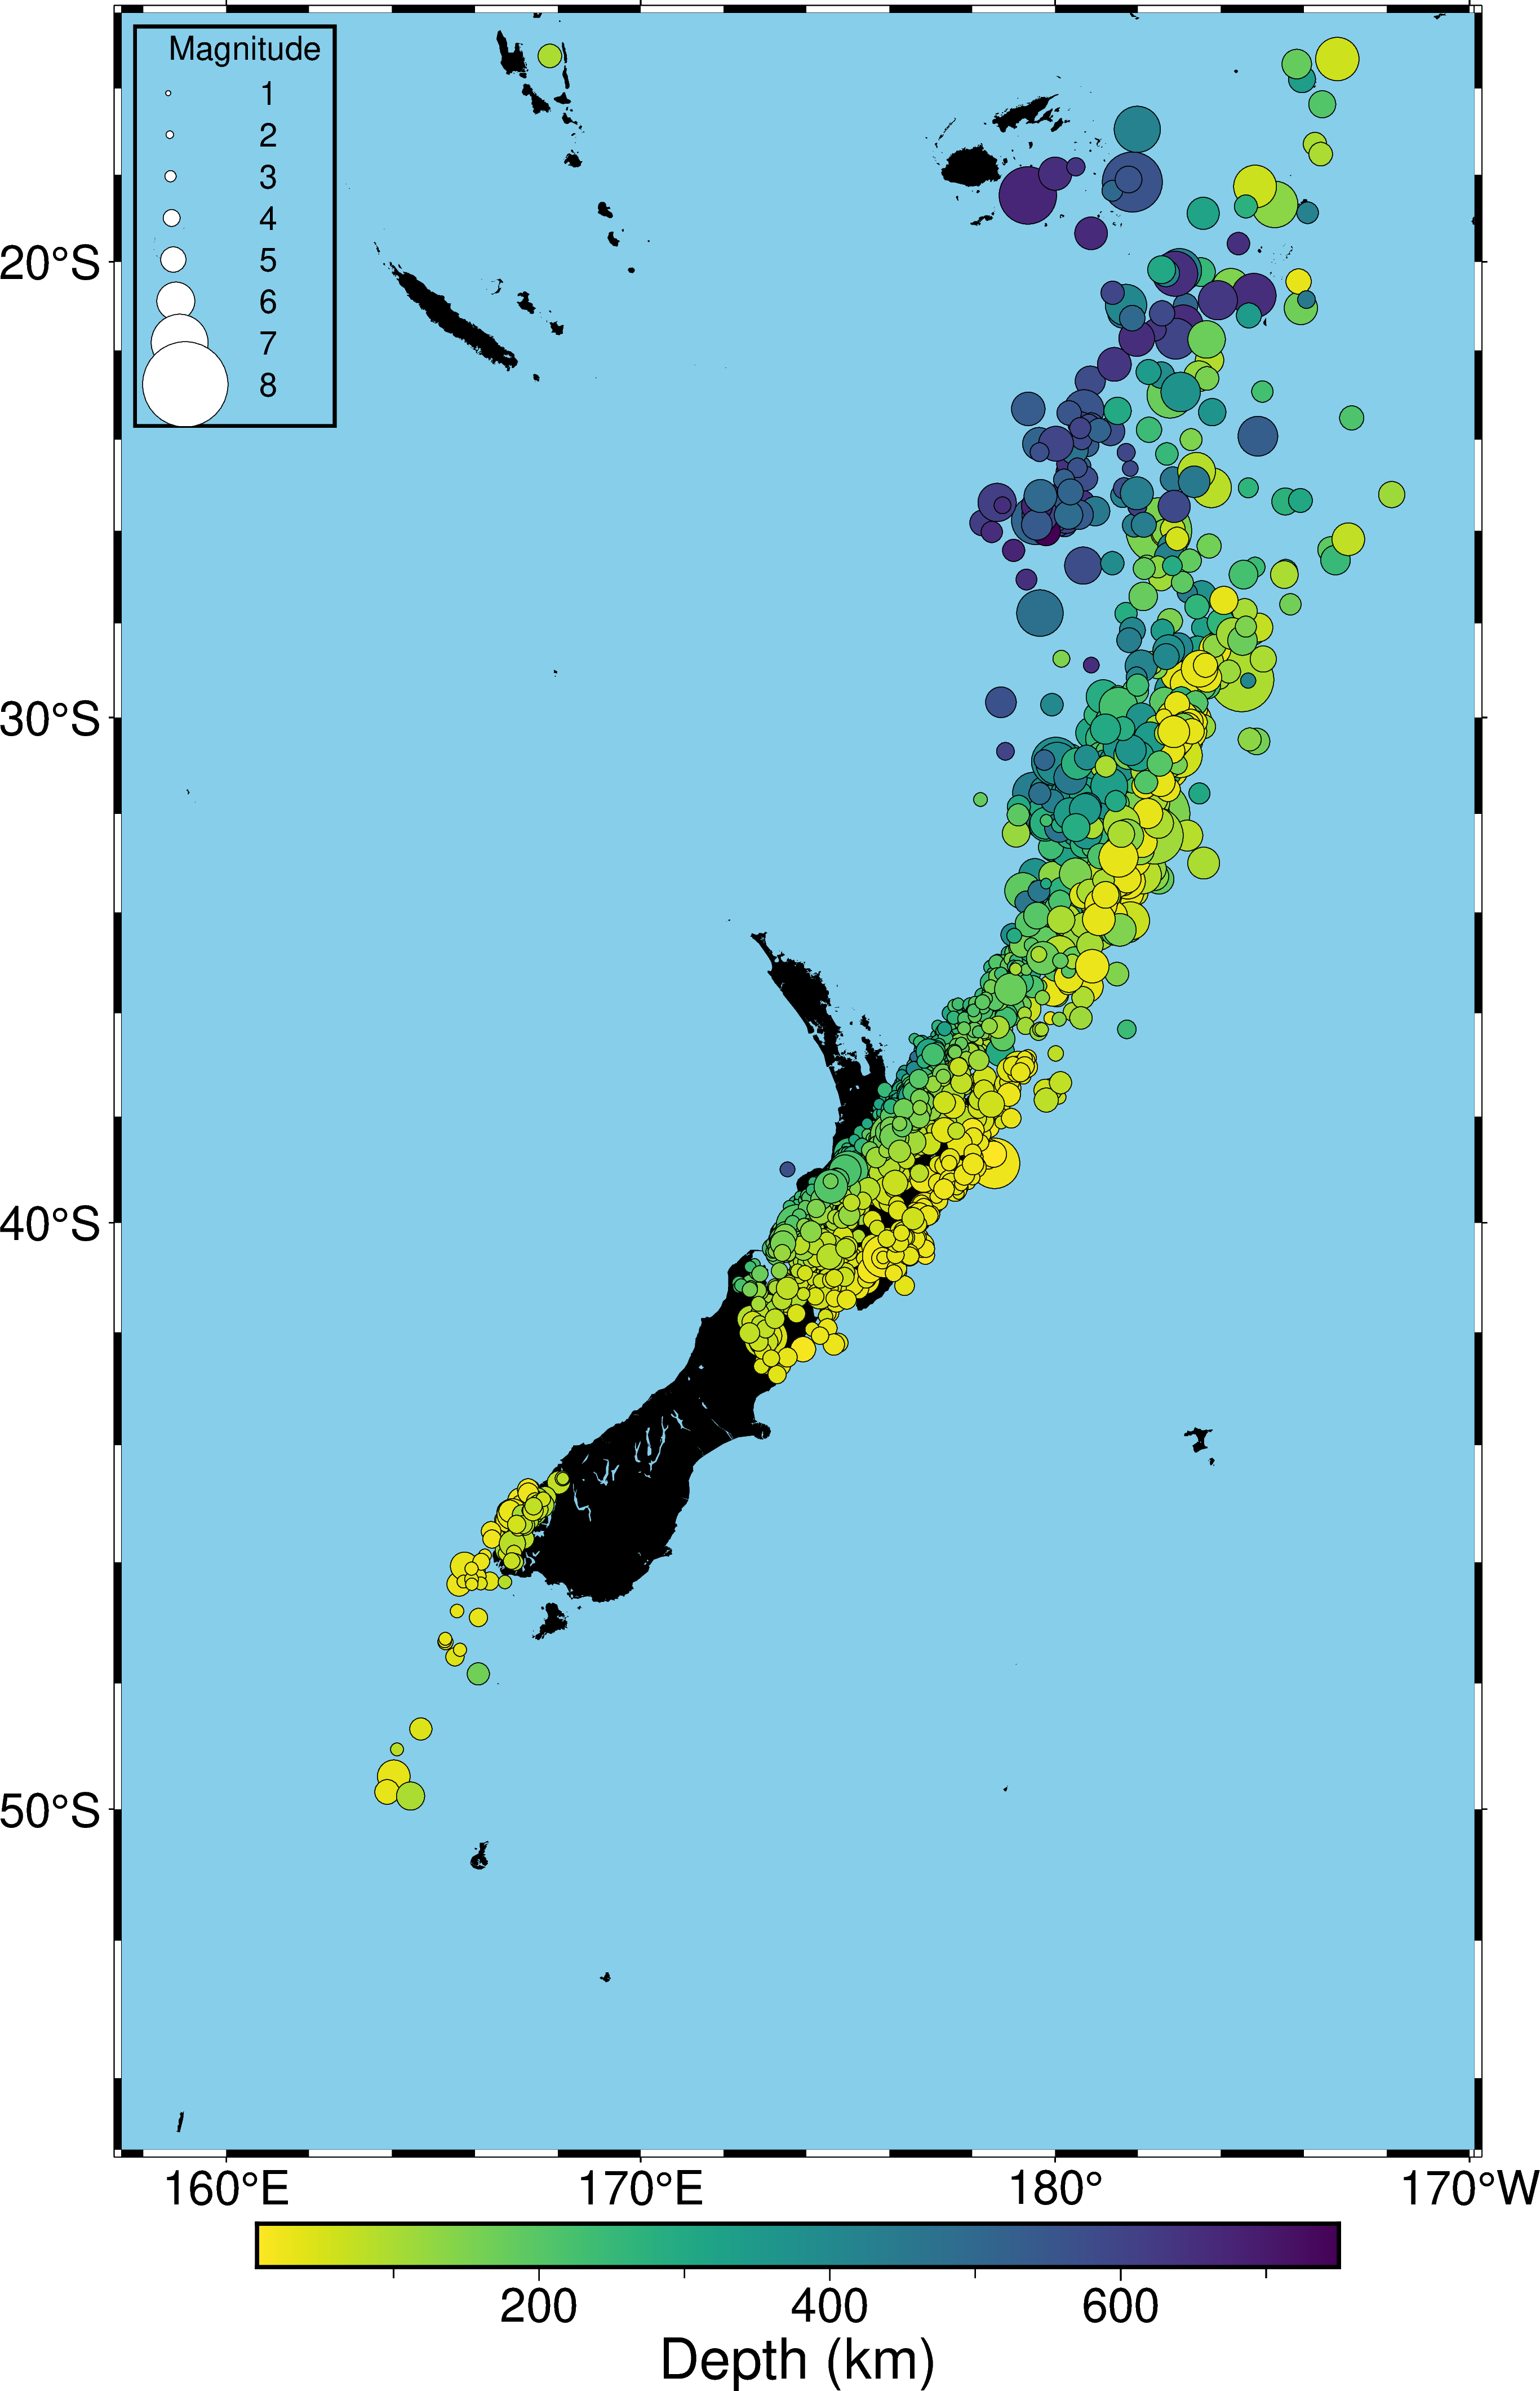

In [11]:
fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="black", water="skyblue")
data['tect_class'] = data.tect_class.astype(dtype='category')
data_sub = data[data.tect_class == 'Slab']
pygmt.makecpt(cmap="viridis",
              reverse=True,
              series=[data_sub.depth.min(),data_sub.depth.max()])
fig.plot(x=data_sub.lon, 
         y=data_sub.lat,
         size=0.05 * 1.5 ** data_sub.mag,
         style="cc",
         fill=data_sub.depth,
         cmap=True,
         pen="black")
fig.colorbar(frame='af+l"Depth (km)"')
with fig.inset(position="jTL+w3c/6c+o0.2c", margin=0, box=True):
    fig.basemap(region=[0, 3, 0, 6], projection="X3c/6c", frame=True)
    mag_circles = np.array([[0.5, 5, 0.05 * 1.5 ** 1],
                    [0.5225, 4.375, 0.05 * 1.5 ** 2],
                    [0.53375, 3.75, 0.05 * 1.5 ** 3],
                    [0.55063, 3.125, 0.05 * 1.5 ** 4],
                    [0.57594, 2.5, 0.05 * 1.5 ** 5],
                    [0.61391, 1.875, 0.05 * 1.5 ** 6],
                    [0.67086, 1.25, 0.05 * 1.5 ** 7],
                    [0.75629, .625, 0.05 * 1.5 ** 8]])   
    text_array = np.array([[2, 5, '1'],
                    [2, 4.375, '2'],
                    [2, 3.75, '3'],
                    [2, 3.125, '4'],
                    [2, 2.5, '5'],
                    [2, 1.875, '6'],
                    [2, 1.25, '7'],
                    [2, .625, '8']])
    fig.plot(data=mag_circles,style='cc',fill='white',pen='black')
    fig.text(text='Magnitude',x=0.5,y=5.5,justify='LB', font='14p')
    for vals in text_array:
        fig.text(text=str(vals[2]),x=float(vals[0]),y=float(vals[1]), font='14p')
fig.savefig('slab_locations.pdf')
fig.show()

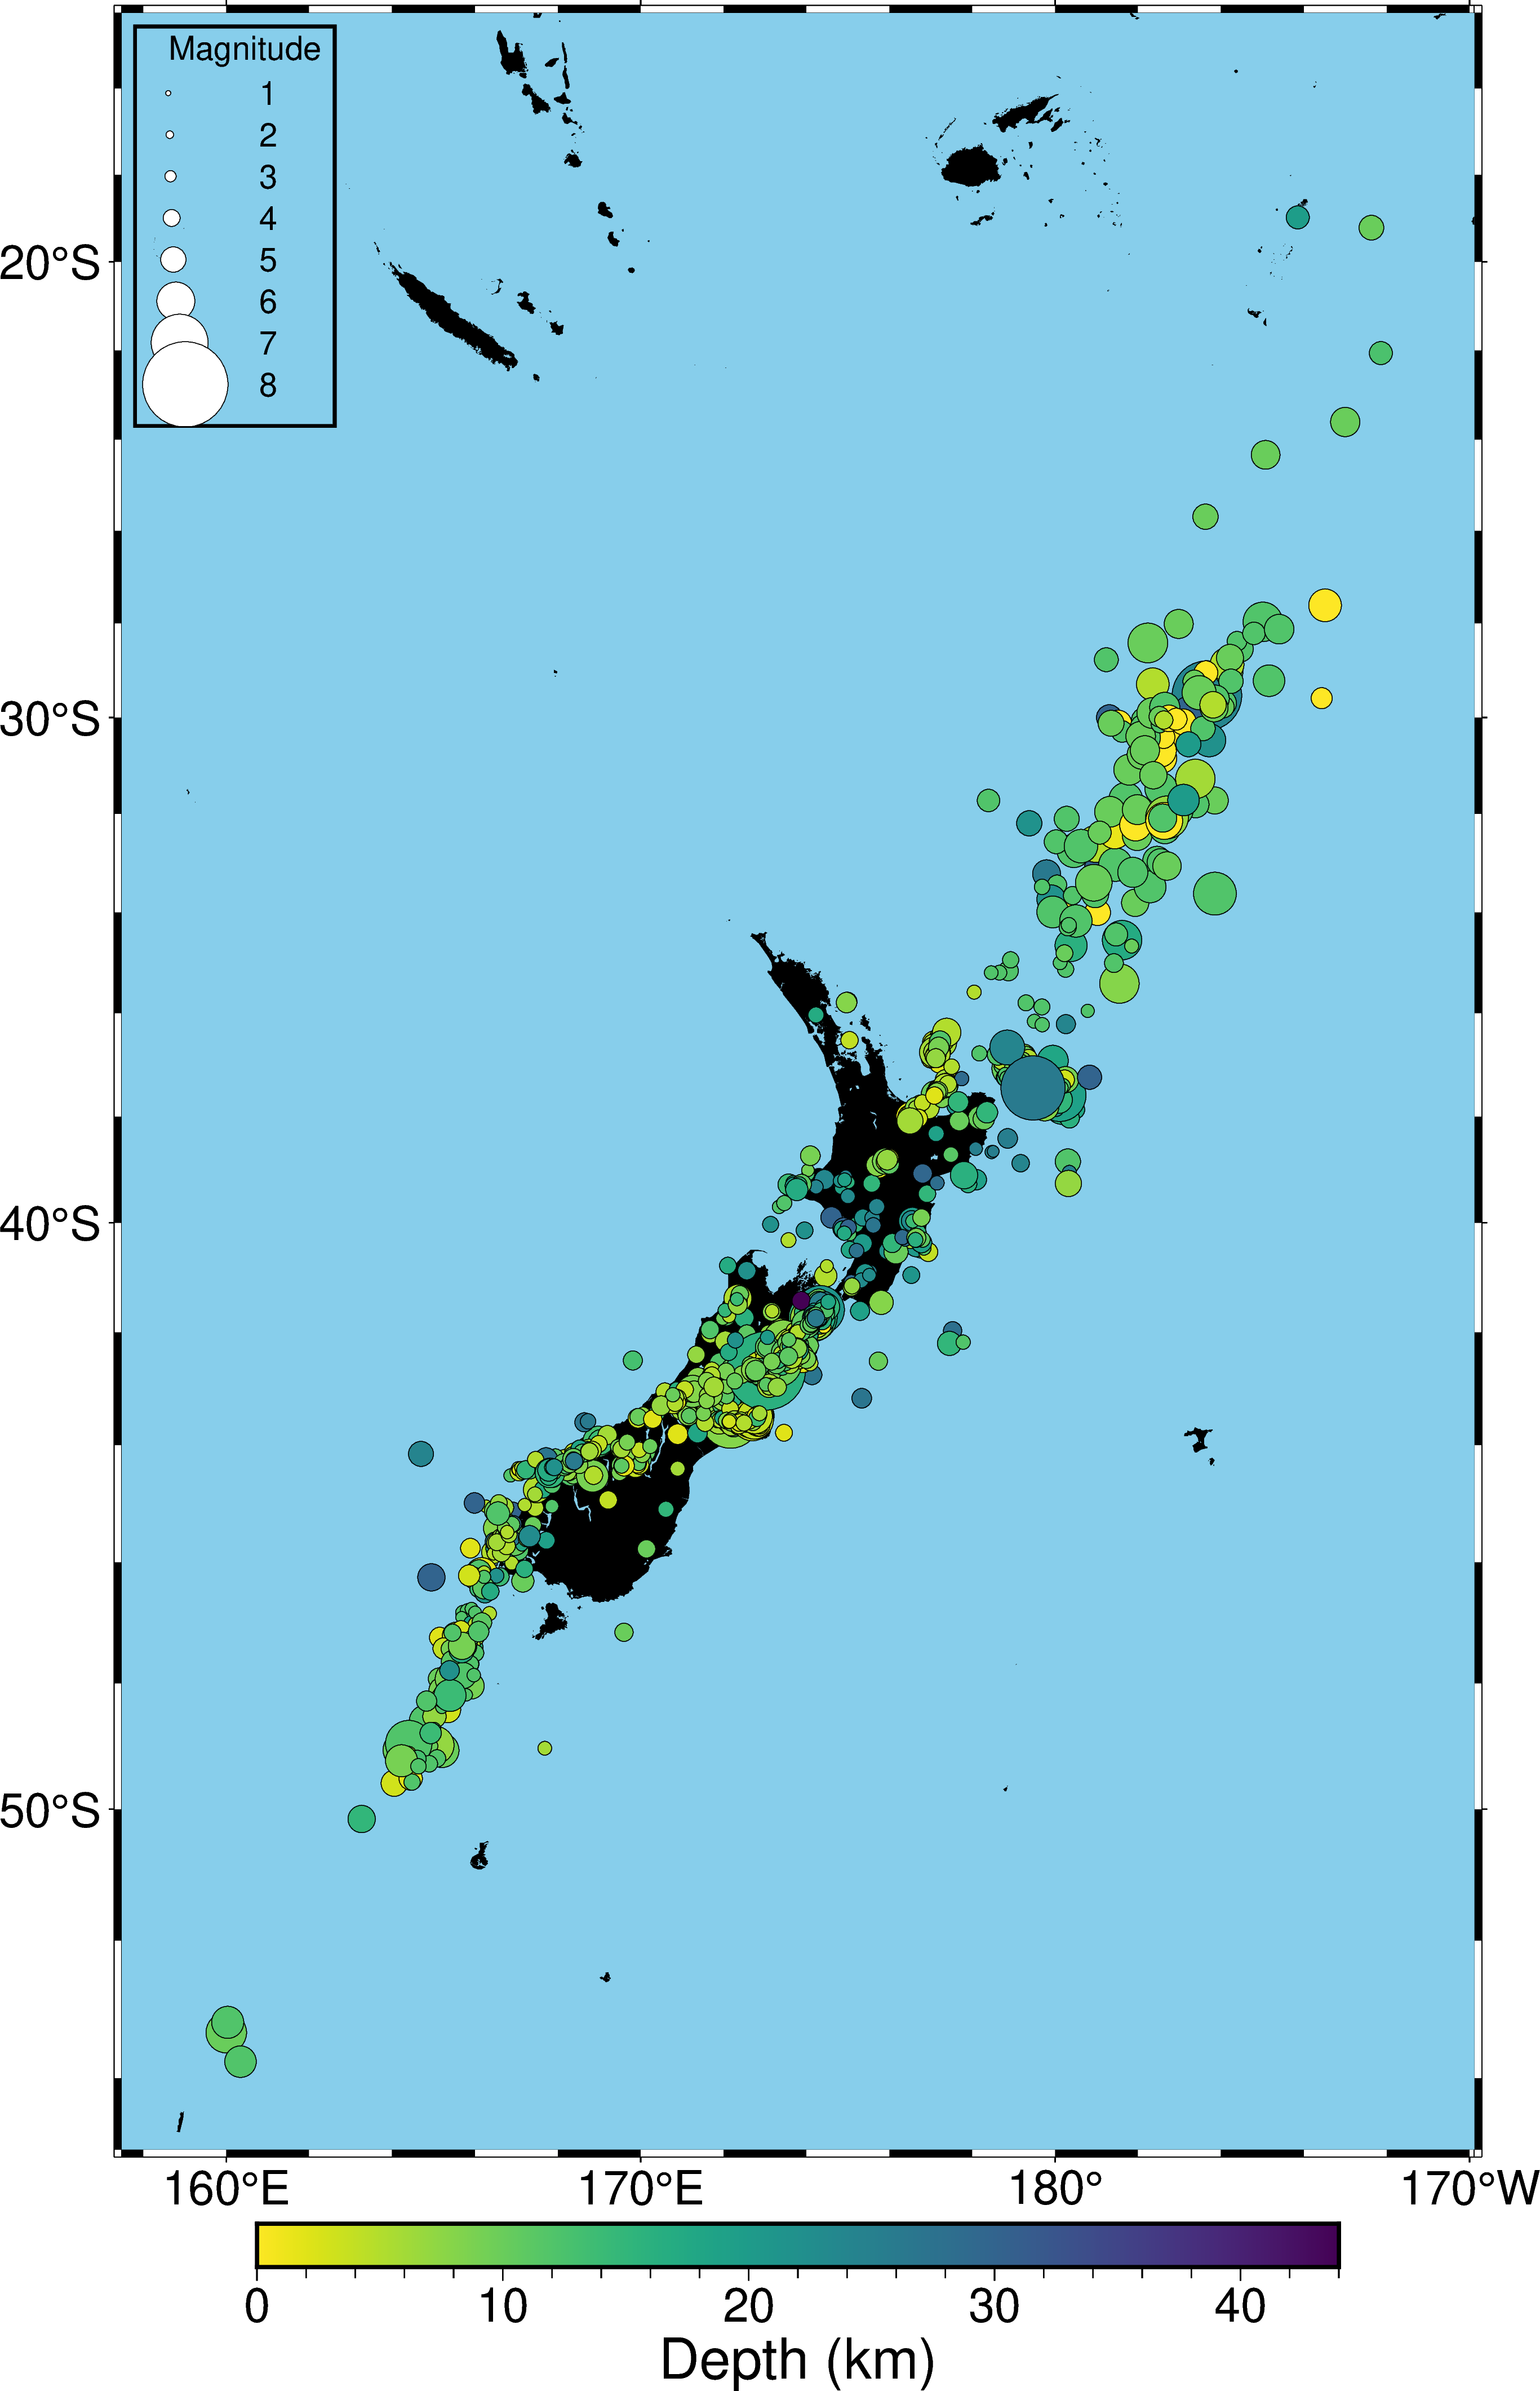

In [12]:
fig = pygmt.Figure()
pygmt.config(FONT_ANNOT='20p',
             FONT_LABEL='24p')
fig.basemap(region=region, projection="M8i", frame=True)
fig.coast(land="black", water="skyblue")
data['tect_class'] = data.tect_class.astype(dtype='category')
data_sub = data[data.tect_class == 'Crustal']
pygmt.makecpt(cmap="viridis",
              reverse=True,
              series=[data_sub.depth.min(),data_sub.depth.max()])
fig.plot(x=data_sub.lon, 
         y=data_sub.lat,
         size=0.05 * 1.5 ** data_sub.mag,
         style="cc",
         fill=data_sub.depth,
         cmap=True,
         pen="black")
fig.colorbar(frame='af+l"Depth (km)"')
with fig.inset(position="jTL+w3c/6c+o0.2c", margin=0, box=True):
    fig.basemap(region=[0, 3, 0, 6], projection="X3c/6c", frame=True)
    mag_circles = np.array([[0.5, 5, 0.05 * 1.5 ** 1],
                    [0.5225, 4.375, 0.05 * 1.5 ** 2],
                    [0.53375, 3.75, 0.05 * 1.5 ** 3],
                    [0.55063, 3.125, 0.05 * 1.5 ** 4],
                    [0.57594, 2.5, 0.05 * 1.5 ** 5],
                    [0.61391, 1.875, 0.05 * 1.5 ** 6],
                    [0.67086, 1.25, 0.05 * 1.5 ** 7],
                    [0.75629, .625, 0.05 * 1.5 ** 8]])   
    text_array = np.array([[2, 5, '1'],
                    [2, 4.375, '2'],
                    [2, 3.75, '3'],
                    [2, 3.125, '4'],
                    [2, 2.5, '5'],
                    [2, 1.875, '6'],
                    [2, 1.25, '7'],
                    [2, .625, '8']])
    fig.plot(data=mag_circles,style='cc',fill='white',pen='black')
    fig.text(text='Magnitude',x=0.5,y=5.5,justify='LB', font='14p')
    for vals in text_array:
        fig.text(text=str(vals[2]),x=float(vals[0]),y=float(vals[1]),font='14p')
fig.savefig('crustal_locations.pdf')
fig.show()

In [13]:
# Calculate location offset for relocated data

geonet_df = pd.read_csv('/Volumes/SeaJade 2 Backup/NZ/NZ_EQ_Catalog/earthquakes.csv',low_memory=False)
geonet_df = geonet_df.sort_values('origintime')
geonet_df['origintime'] = pd.to_datetime(geonet_df['origintime'],format='%Y-%m-%dT%H:%M:%S.%fZ')
geonet_df = geonet_df.reset_index(drop=True)

relocs = data[data.reloc != 'no'].copy()

relocs['evid'] = relocs['evid'].astype(str)

geonet_matched = geonet_df[np.isin(geonet_df.publicid,relocs.evid)].copy()
geonet_matched.rename(columns={'publicid':'evid','latitude':'lat_geo','longitude':'lon_geo',
                              'depth':'depth_geo'},inplace=True)
geonet_matched['evid'] = geonet_matched.evid.astype(str)

merged_locs = relocs.join(geonet_matched[['evid','lat_geo','lon_geo','depth_geo']].set_index('evid'),on='evid')

from obspy.geodetics import locations2degrees,degrees2kilometers,kilometers2degrees
import obspy as op

dist, az, b_az = map(np.array,zip(*[op.geodetics.gps2dist_azimuth(x.lat,
                x.lon,x.lat_geo,x.lon_geo) for i,x in merged_locs.iterrows()]))


r_epis = dist/1000
merged_locs['r_hyp'] = (r_epis ** 2 + (merged_locs.depth - merged_locs.depth_geo) ** 2) ** 0.5


In [14]:
merged_locs.nlargest(10,columns='r_hyp')[['evid','r_hyp','lat','lon','lat_geo','lon_geo']]
geonet_df[geonet_df.publicid == '3140527']

publicid   eventtype              origintime          modificationtime  \
174167  3140527  earthquake 2009-08-17 19:27:25.989  2013-06-25T15:45:00.000Z   

        longitude  latitude  magnitude  depth magnitudetype  \
174167  165.84048 -45.91533      4.401   12.0            ML   

                depthtype  ... evaluationstatus evaluationmode earthmodel  \
174167  operator assigned  ...         reviewed         manual      nz1dr   

       usedphasecount  usedstationcount  magnitudestationcount  \
174167             20                12                     21   

        minimumdistance  azimuthalgap  originerror  magnitudeuncertainty  
174167            0.471         289.0      0.18845                 0.161  

[1 rows x 21 columns]

In [15]:
# Determine the upper limit to remove outliers
upper = merged_locs.r_hyp.mean() + merged_locs.r_hyp.std() * 2

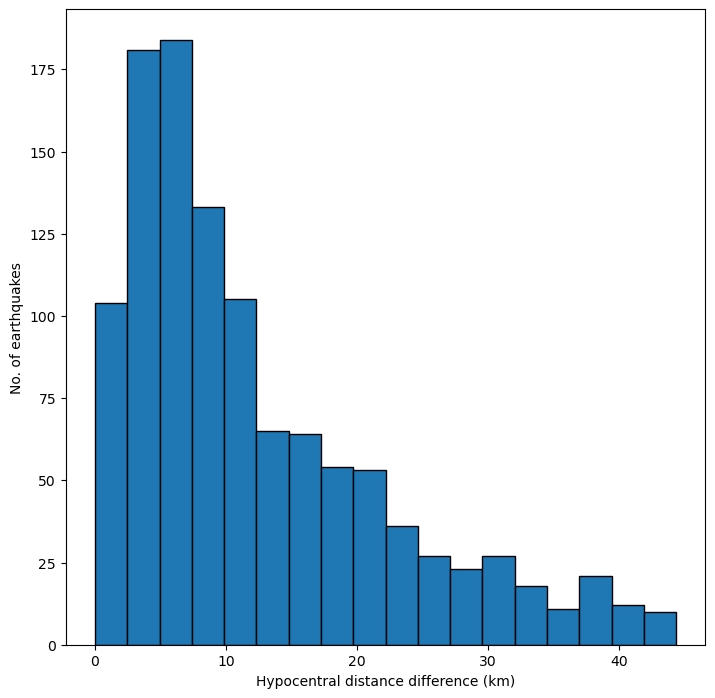

In [19]:
f, ax = plt.subplots(1, 1,figsize=(8.25,8.25))
ax.hist(merged_locs[merged_locs['r_hyp'] <= upper].r_hyp,bins='auto',edgecolor="k")
ax.set_xlabel('Hypocentral distance difference (km)')
ax.set_ylabel('No. of earthquakes')
plt.savefig(fig_dir+'/reloc_diff.pdf')
plt.show()

In [20]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import datetime
from scipy.stats import norm
import scipy.stats as ss
from math import lgamma
import matplotlib.pyplot as plt
from matplotlib import rc
rc("pdf",fonttype=42)

# Adapted from R code provided by Mignan and Woessner, 2012, 'Estimating the magnitude of 
# completeness for earthquake catalogs'
      
def error_func(p0,m,N):
	err1 = N-norm.cdf(m,p0[0],p0[1])
	err2 = ((N-norm.cdf(m,p0[0],p0[1])))**2
	err = err1
# 	print(err)
	return err

def fmd(mag,mbin):
	min_mag = np.floor(min(mag)) 
	max_mag = np.ceil(max(mag))
	mi = np.arange(min_mag, max_mag, mbin)
	nbm = len(mi)
	cumnbmag = np.zeros(nbm)
	nbmag = np.zeros(nbm)
	for i in range(0,nbm):
		cumnbmag[i] = len(mag[mag > (mi[i]-mbin/2)])
	cumnbmagtmp = np.append(cumnbmag,0)
	nbmag = abs(np.diff(cumnbmagtmp))
# 	res = list(m=mi cum=cumnbmag noncum=nbmag)
	m = np.ndarray.flatten(mi)
	cum = np.ndarray.flatten(cumnbmag)
	noncum = np.ndarray.flatten(nbmag)
	return m,cum,noncum
	
#Maximum Curvature (MAXC) [e.g., Wiemer & Wyss, 2000]
def maxc(mag,mbin):
	m, cum, noncum = fmd(mag,mbin)
	Mc = m[np.where(noncum == max(noncum))[0]][0]
	return Mc
	
#Goodness-of-fit test (GFT) [Wiemer & Wyss, 2000]
def gft(mag,mbin):
	m, cum, noncum = fmd(mag,mbin)
	McBound = maxc(mag,mbin)
	Mco = McBound-0.4+(np.arange(1,16)-1)/10
	R = np.zeros(len(Mco))
	a = np.zeros(len(Mco))
	b = np.zeros(len(Mco))
	for i in range(0,len(R)):
		indmag = np.where(mag > Mco[i]-mbin/2)[0]
		b[i] = np.log10(np.exp(1))/(np.mean(mag[indmag])-(Mco[i]-mbin/2))
		a[i] = np.log10(len(indmag))+b[i]*Mco[i]
		FMDcum_model = 10**(a[i]-b[i]*m)
		indmi = np.where(m >= Mco[i])[0]
		R[i] = np.sum(abs(cum[indmi]-FMDcum_model[indmi]))/np.sum(cum[indmi])*100
	indGFT = np.where(R <= 5)[0]
	if len(indGFT) != 0:
		Mc = Mco[indGFT[0]]
		a_best = a[indGFT[0]]
		b_best = b[indGFT[0]]
# 		a_best = a[np.where(R == np.min(R))[0][0]]
# 		b_best = b[np.where(R == np.min(R))[0][0]]

		best = "95%"
	else:
		indGFT = np.where(R <= 10)[0]
		if len(indGFT) != 0:
			Mc = Mco[indGFT[0]]
			a_best = a[indGFT[0]]
			b_best = b[indGFT[0]]
			a_best = a[np.where(R == np.min(R))[0][0]]
			b_best = b[np.where(R == np.min(R))[0][0]]
			best = "90%"
		else:
			Mc = McBound
			indGFT = np.where(Mco == McBound)[0]
			a_best = a[indGFT]
			b_best = b[indGFT]
# 			a_best = a[np.where(R == np.min(R))[0][0]]
# 			b_best = b[np.where(R == np.min(R))[0][0]]
			best = 'MAXC'
	if a_best.shape == (1,):
		a_best = a_best[0]
	elif a_best.shape == (0,):
		return
	if b_best.shape == (1,):
		b_best = b_best[0]
	elif b_best.shape == (0,):
		return

	return Mc, a_best, b_best, best, Mco, R
	
#Mc by b-val Stability (MBS) [Cao & Gao, 2002]
#Modification with Shi & Bolt [1982] uncertainty [Woessner & Wiemer, 2005]
def mbs(mag,mbin):
	McBound = maxc(mag,mbin)
	Mco = McBound-0.7+(np.arange(1,21)-1)/10
	bi = np.zeros(len(Mco))
	ai = np.zeros(len(Mco))
	unc = np.zeros(len(Mco))
	a_unc = np.zeros(len(Mco))
	for i in range(0,len(Mco)):
		indmag = np.where(mag > Mco[i]-mbin/2)[0]
		nbev = len(indmag)
		bi[i] = np.log10(np.exp(1))/(np.mean(mag[indmag])-(Mco[i]-mbin/2))
		ai[i] = np.log10(len(indmag))+bi[i]*Mco[i]
# 		print(ai[i])
		unc[i] = 2.3*bi[i]**2*np.sqrt(np.sum((mag[indmag]-np.mean(mag[indmag]))**2)/(nbev*(nbev-1)))
	bave = np.zeros(15)
	aave = np.zeros(15)
	for i in range(len(bave)):
		bave[i] = np.mean(bi[i:i+5])
		aave[i] = np.mean(ai[i:i+5])
	dbi_old = abs(np.diff(bi))
	indMBS_old = np.where(dbi_old <= 0.03)[0]
	dbi = abs(bave[0:15]-bi[0:15])
	indMBS = np.where(dbi <= unc[0:15])[0]
	Mc = Mco[indMBS[0]]
	b = bi[indMBS[0]]
	a = ai[indMBS[0]]
	return Mc, Mco, bi, unc, a_unc, b, a
	
#Entire Magnitude Range method (EMR) [Woessner & Wiemer, 2005]
def emr(mag,mbin):
	m,cum,noncum = fmd(mag,mbin)
	nbm = len(m)
	McMAXC = maxc(mag,mbin)
	mu = abs(McMAXC/2)
	sig = abs(McMAXC/4)
	if mu > 1:
		mu = abs(McMAXC/10)
		sig = abs(McMAXC/20)
	McBound = McMAXC
	Mco = McBound-0.3+(np.arange(1,10)-1)/10
	params = np.zeros(shape=(9,4)) #a, b, mu, sigma
	prob = np.zeros(9)
	savedmodel = np.zeros(shape=(9,nbm))
	for i in range(0,9):
		indmag = np.where(mag > Mco[i]-mbin/2)[0]
		nbev = len(indmag)
		b = np.log10(np.exp(1))/(np.mean(mag[indmag])-(Mco[i]-mbin/2))
		a = np.log10(len(indmag))+b*Mco[i]
		cumN = 10**(a-b*m)
		params[i,0] = a
		params[i,1] = b

		cumNtmp = 10**(a-b*(np.max(m)+mbin))
		cumNtmp = np.repeat(cumNtmp,len(cumN))
		N = abs(np.diff([cumNtmp,cumN],axis=0))[0]
		data = pd.DataFrame(data={'N':N,'m':m,'Nd':noncum})
		indLow = np.where(m < Mco[i])[0]
		indHigh = np.where(m >= Mco[i])[0]
		dataTest = pd.DataFrame(data={'N':N[indLow],'m':m[indLow],'Nd':noncum[indLow]})
		dataTmp = pd.DataFrame(data={'N':N[indHigh],'m':m[indHigh],'Nd':noncum[indHigh]})
		checkNo0 = dataTest[dataTest['N'] != 0]
		dataTest = checkNo0
		Nmax = max(dataTmp['N'])
		Mmintmp = min(dataTest['m'])
		dataTest['Nd'] = dataTest['Nd']/Nmax
		dataTest['m'] = dataTest['m']-Mmintmp
		data4fit = pd.DataFrame(data={'N':dataTest['Nd'],'m':dataTest['m']})

		#non-linear least squares fit
	# 	p0 = np.array([mu[0],sig[0]])
		ydata = np.array(data4fit['N'])
		xdata = np.array(data4fit['m'])
		p0 = np.array([0,1])
		nlsfit,success = optimize.leastsq(error_func, p0, args = (xdata,ydata),maxfev=1000)
		params[i,2] = nlsfit[0]
		params[i,3] = nlsfit[1]
		dataTest['N'] = norm.cdf(dataTest['m'],nlsfit[0],nlsfit[1])*Nmax
		dataTest['m'] = dataTest['m']+Mmintmp
		dataTest['Nd'] = dataTest['Nd']+Nmax
		dataPred = dataTest.append(dataTmp,ignore_index=True)
		savedmodel[i] = np.array(dataPred['N'])

		#CHECK EMR METHOD#
		CheckNo0 = np.where(dataPred['N'] != 0)[0]
		Pmodel = dataPred['N'][CheckNo0]
		Pdata = dataPred['Nd'][CheckNo0]
# 		print(len(Pmodel),len(Pdata))
		Pgamma = []
		for data in Pdata: 
			Pgamma.append(lgamma(data+1))
# 		print(len(Pgamma))
		probtmp = (1/np.log(10))*(-np.array(Pmodel)+np.array(Pdata)*np.log(np.array(Pmodel))-Pgamma)
# 		print(CheckNo0)
		prob[i] = np.sum(probtmp)
	indbestfit = np.where(prob == min(prob))[0]
	return Mco[indbestfit],params[indbestfit,0],params[indbestfit,1],params[indbestfit,2],params[indbestfit,3],savedmodel[indbestfit],Mco,prob
# 	print(dataTest)

def mbass(a,delta):
	m,cum,noncum = fmd(a,delta)
	McBound = maxc(a,delta)
	tau = []
	pva = []
	minmag = McBound
# 	g_r = plt.hist(a,noncum,width=delta)
	n = len(noncum)
# 	n = len
# 	xc = np.arange(min(a),max(a),delta/2)[0:n-1]
# 	log_nc = np.log10((1/delta)*len(a)-cum[0:n-1]*delta)
	x = m
	log_n = np.log10(noncum)
	x = x[np.nonzero(log_n[np.where(np.isfinite(log_n))])]
	log_n = log_n[np.nonzero(log_n[np.where(np.isfinite(log_n))])]
	sl = np.diff(log_n)/np.diff(x)
	xsl = x[1:len(x)]
	niter = 3
	N = len(sl)
	j = 0
	k = 0
	n0 = []
	SA = np.zeros(N+1)
	while j < niter:
		for i in range(0,N):
			SA[i] = np.abs(2*np.sum(ss.rankdata(sl)[0:i])-i*(N+1))
		n1 = np.where(SA == SA[np.argsort(SA)[len(SA)-1]])[0]
		xn1 = sl[0:n1[0]]
		xn2 = sl[-n1[0]:]
		if n1[0] > 2 and n1[0] <= N-2 and ss.wilcoxon(xn1,xn2,correction=True)[1] < 0.05: # statistical significance of each new change point
			k = k+1
			pva.append(ss.wilcoxon(xn1,xn2,correction=True)[1])
# 			print(pva)
			tau.append(n1[0])
			if k > 1:
				meds11 = np.median(sl[0:n0])
				meds12 = np.median(sl[-n0:])
				for l in range(0,n0):
					sl[l] = sl[l]+meds11
				for l in range(n0,len(sl)):
					sl[l] = sl[l]+meds12
			meds11 = np.median(sl[0:n1[0]])
			meds12 = np.median(sl[-n1[0]:])
			for l in range(0,n1[0]):
				sl[l] = sl[l]+meds11
			for l in range(n1[0],len(sl)):
				sl[l] = sl[l]+meds12
			n0 = n1[0]
		j = j+1
	v_pva = np.array(pva)
	ip = np.argsort(v_pva)
	m0 = (xsl[tau[ip[0]]],xsl[tau[ip[1]]])
	indmag = np.where(a > m0[0]-delta/2)[0]
	b = np.log10(np.exp(1))/(np.mean(a[indmag])-(m0[0]-delta/2)) ### Work on this
	a_val = np.log10(len(indmag))+b*m0[0]
	return m0[0],xsl[tau],v_pva,a_val,b

In [22]:
data = pd.read_csv('Tables/earthquake_source_table.csv')

event_mag = data.mag.values

In [23]:
Ml = event_mag
interval = 0.1
low_mc = 4.5
mag_cutoff = 8
nbsample = 1000
Mc_bootstrap = []
a_bootstrap = []
b_bootstrap = []

Ml = Ml[Ml<=mag_cutoff]
Ml_in = Ml[Ml>=low_mc]
method = 'maxc'
for i in range(nbsample):
    if method == 'maxc':
        Mc = maxc(np.random.choice(Ml_in,size=len(Ml_in),replace=True),interval)
        Mc_bootstrap.append(Mc)
        indmag = np.where(Ml >= Mc-interval/2)[0]
        b = np.log10(np.exp(1))/(np.mean(Ml[indmag])-(Mc-interval/2))
        a = np.log10(len(indmag))+b*Mc
        a_bootstrap.append(a)
        b_bootstrap.append(b)
    if method == 'gft':
        try:
            Mc,a,b,best,Mco,R = gft(np.random.choice(Ml_in,size=len(Ml_in),replace=True),interval)
            Mc_bootstrap.append(Mc)
            a_bootstrap.append(a)
            b_bootstrap.append(b)
        except:
            pass
    if method == 'mbs':
        try:
            Mc,Mco,bi,b_unc,a_unc,b,a = mbs(np.random.choice(Ml_in,size=len(Ml_in),replace=True),interval)
            Mc_bootstrap.append(Mc)
            a_bootstrap.append(a)
            b_bootstrap.append(b)
        except:
            pass
    if method == 'emr':
        try:
            Mc,a,b,mu,sigma,savedmodel,Mco,prob = emr(np.random.choice(Ml_in,size=len(Ml_in),replace=True),interval)
            Mc_bootstrap.append(Mc)
            a_bootstrap.append(a)
            b_bootstrap.append(b)
        except:
            pass
    if method == 'mbass':
        try:
            Mc,xsl,v_pva,a,b = mbass(np.random.choice(Ml_in,size=len(Ml_in),replace=True),interval)
#     			print(Mc)
            Mc_bootstrap.append(Mc)
            a_bootstrap.append(a)
            b_bootstrap.append(b)
        except:
            pass
mean_Mc = np.mean(Mc_bootstrap)
std_Mc = np.std(Mc_bootstrap)
# Fit the slope to the Magnitude of completeness
indmag = np.where(Ml >= mean_Mc-interval/2)[0]
b = np.log10(np.exp(1))/(np.mean(Ml[indmag])-(mean_Mc-interval/2))
a = np.log10(len(indmag))+b*mean_Mc

# Fit the slope to a defined magnitude
#     indmag = np.where(Ml >= low_mc-interval/2)[0]
#     b = np.log10(np.exp(1))/(np.mean(Ml[indmag])-(low_mc-interval/2))
#     a = np.log10(len(indmag))+b*low_mc

a_std = np.std(a_bootstrap)
b_std = np.std(b_bootstrap)
#     b = np.mean(b_bootstrap)
#     a = np.mean(a_bootstrap)
print(a,a_std,b,b_std)
indMl = np.arange(mean_Mc,mag_cutoff,interval)
iNcum_ = 10**(a - b * indMl)

## Plot FMD ##
m,cum,noncum = fmd(Ml,interval)

6.674852050932788 0.24261912333586821 0.7377238227599499 0.04538704548872986


/var/folders/qb/b2j2r0pn71n63kdftft4qvwc0000gq/T/ipykernel_2518/3769731301.py:8: RuntimeWarning: divide by zero encountered in log10
  line1, = ax2.plot(m,np.log10(cum),'bo',label='Input Data')


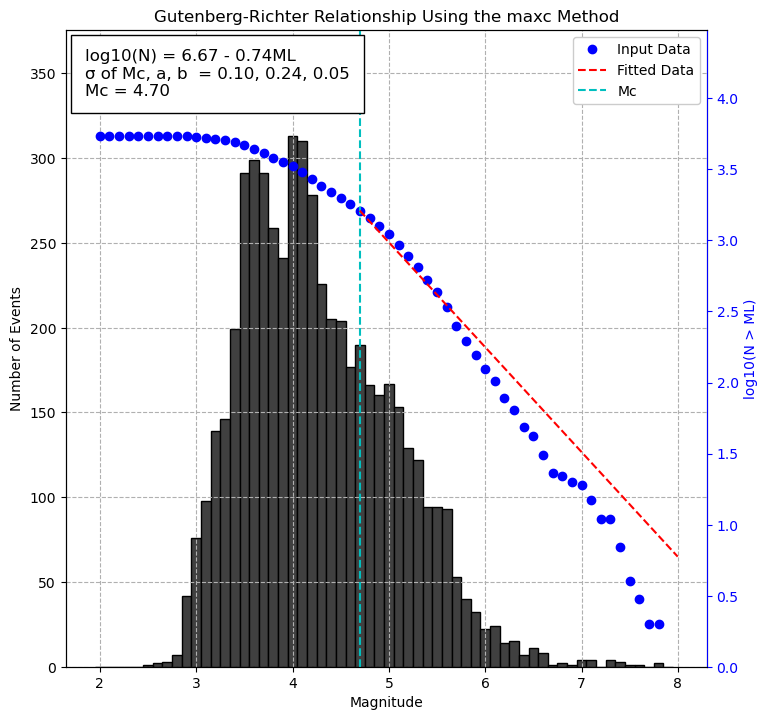

In [24]:
fig, ax1 = plt.subplots(figsize=(8.27,8.27))
#     ax1.plot(m,noncum)
ax1.bar(m,noncum,edgecolor="k",color=[0.25,0.25,0.25],width=interval)
ax1.grid(True,linestyle='--')
ax1.set_ylabel("Number of Events")
ax1.set_ylim(0,max(noncum)*1.2)
ax2 = ax1.twinx()
line1, = ax2.plot(m,np.log10(cum),'bo',label='Input Data')
line3, = ax2.plot([mean_Mc,mean_Mc],[0,np.log10(max(cum))*1.2],'c--',label='Mc')
line2, = ax2.plot(indMl,np.log10(iNcum_),'r--',label='Fitted Data')
ax2.set_ylabel("log10(N > ML)",color='blue')
ax2.set_ylim(0,np.log10(max(cum))*1.2)
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y',colors='blue')
plt.legend(handles=[line1,line2,line3],loc=1, framealpha = 1)
textbox = 'log10(N) = '+'%.2f' % (a)+' - '+'%0.2f' % (b)+'ML \n'+str(u'\u03C3')+' of Mc, a, b  = '+'%0.2f' % (std_Mc)+', '+'%0.2f' % (a_std)+', '+'%0.2f' % (b_std)+'\nMc = '+'%0.2f' % (mean_Mc)
ax2.text(0.03,0.97,textbox,bbox={'facecolor':'white', 'pad':10},fontsize=12,verticalalignment='top',horizontalalignment='left',transform=ax2.transAxes)
plt.title('Gutenberg-Richter Relationship Using the '+str(method)+" Method")
ax1.set_xlabel('Magnitude')
plt.savefig(fig_dir+'/b_value_plot.pdf')
plt.show()

In [25]:
def plot_bargraph_with_groupings(df, groupby, title, xlabel, ylabel, FIG_SIZE=(8.27,8.27)):
    """
    Plots a dataframe showing the frequency of datapoints grouped by one column and coloured by another.
    df : dataframe
    groupby: the column to groupby
    title: the graph title
    xlabel: the x label,
    ylabel: the y label
    """

    # Makes the bargraph.
    ax = df[groupby].value_counts().plot(kind='bar',
                                         figsize=FIG_SIZE,
                                         title=title)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

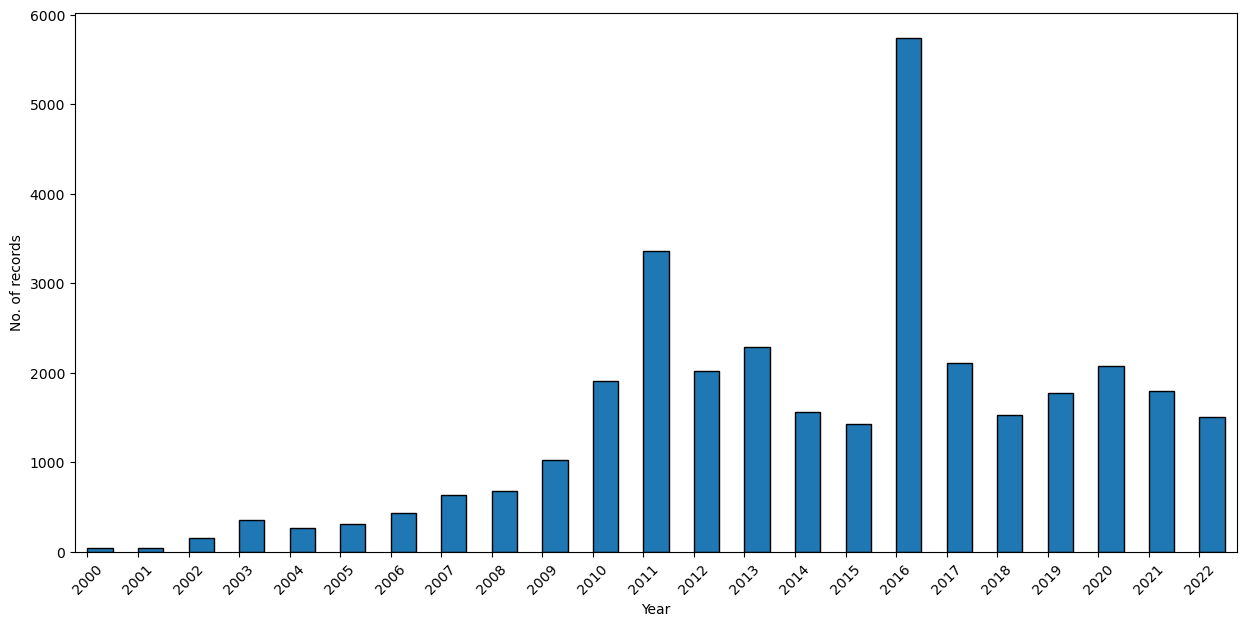

In [26]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# mpl_data = mdates.datestr2num(gm_data['datetime'])

fig, ax = plt.subplots(figsize=(15,7),dpi=100)

# grouped = gm_data
# grouped['datetime'] = grouped['datetime'].astype('datetime64')
# grouped = grouped.groupby(pd.Grouper(key='datetime',freq='Y')).count()
# year = grouped.index.year
# ax.bar(grouped.index.year, grouped['gmid'].values,align='edge',edgecolor='k')
# ax.tick_params(axis='x',labelrotation=45)
# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.set_xlim(year[0],year[-1]+1)
# ax.set_xlabel('Year')
# ax.set_ylabel('No. of records')
# plt.savefig(fig_dir+'/records_per_year.png')

data_grouped = gm_data.groupby([gm_data.datetime.astype('datetime64').dt.year]).count()
data_grouped['gmid'].plot.bar(ax=ax,align='edge',edgecolor='k')
ax.set_xlabel('Year')
ax.set_ylabel('No. of records')
ax.tick_params(axis='x',labelrotation=45)
plt.savefig(fig_dir+'/records_per_year.pdf')

# data_grouped.plot(kind='bar',
#           y=['gmid'],
#           figsize=(8.25,8.25),
#           title='Average Number of Phases and Stations per Event per Year',
#           xlabel='Year',
#           ylabel='Count')



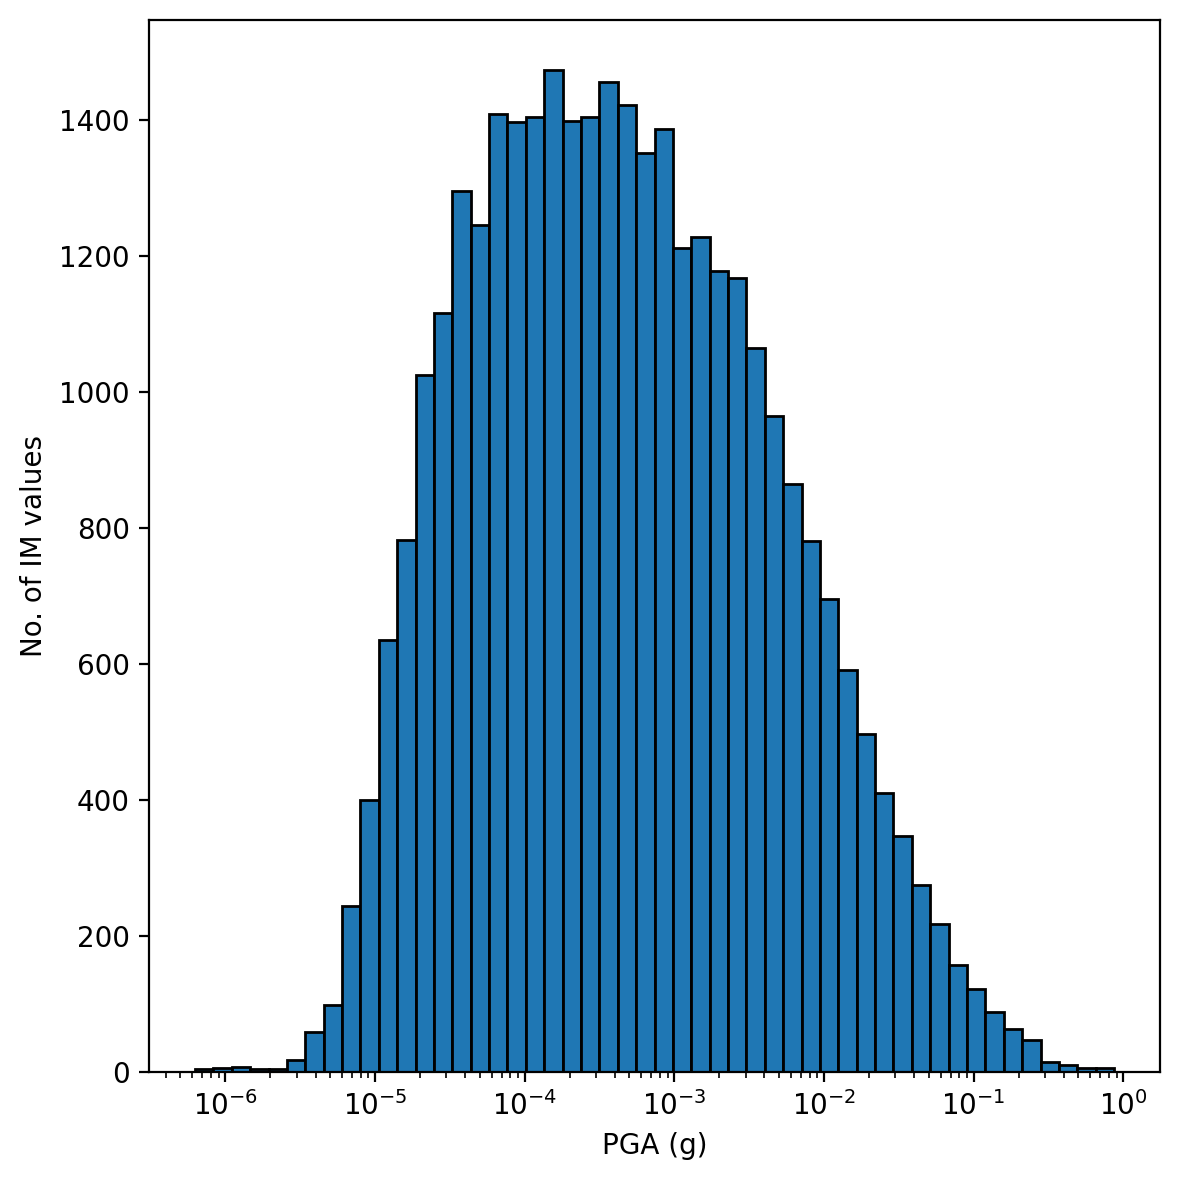

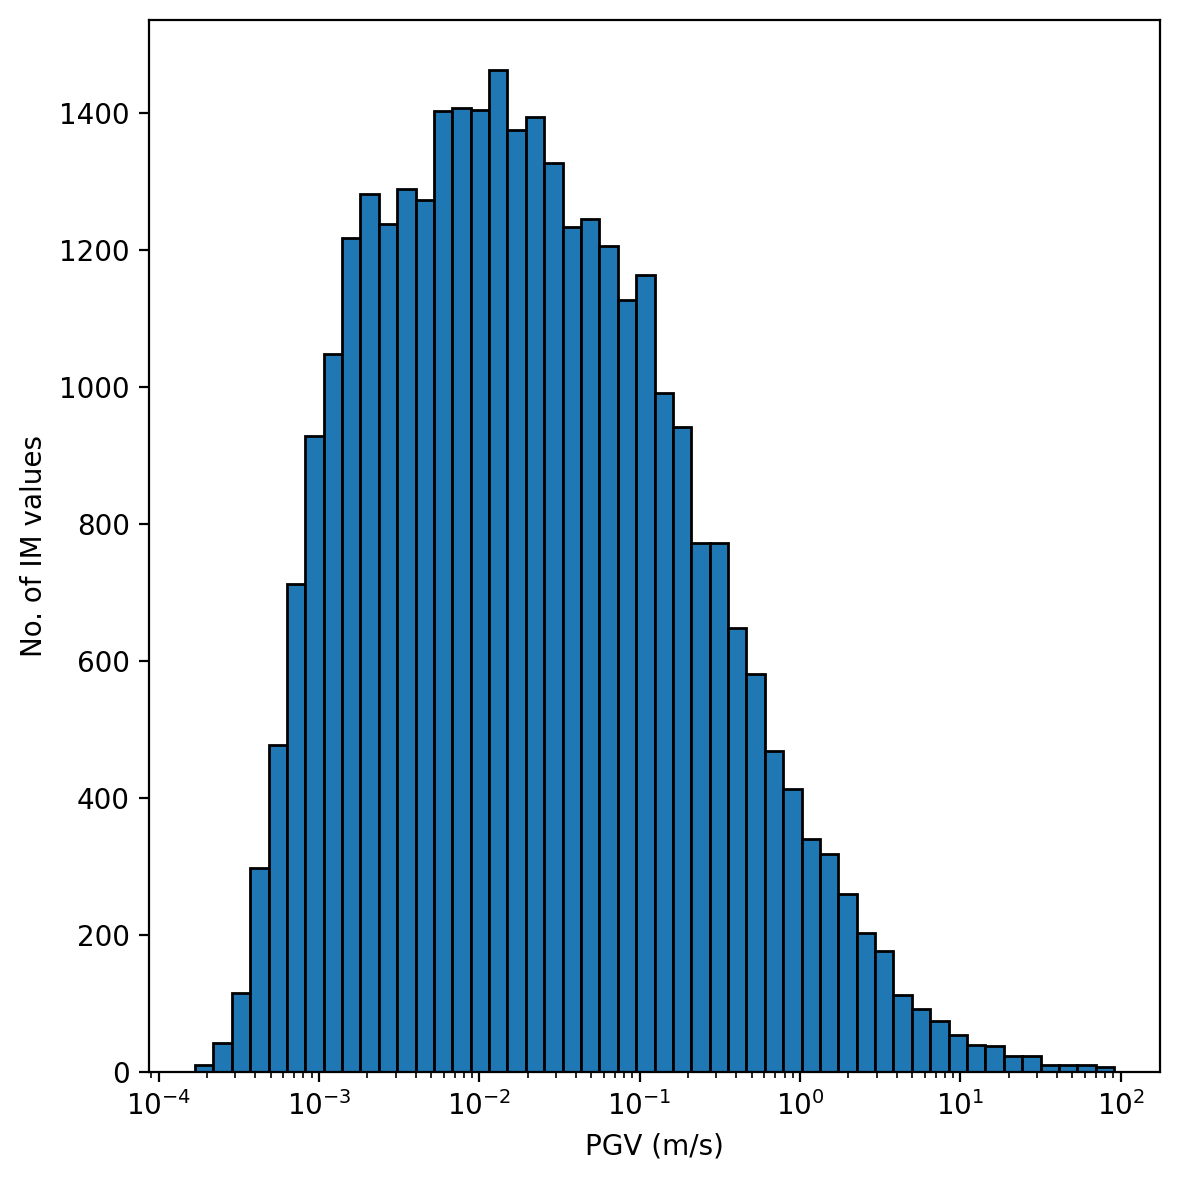

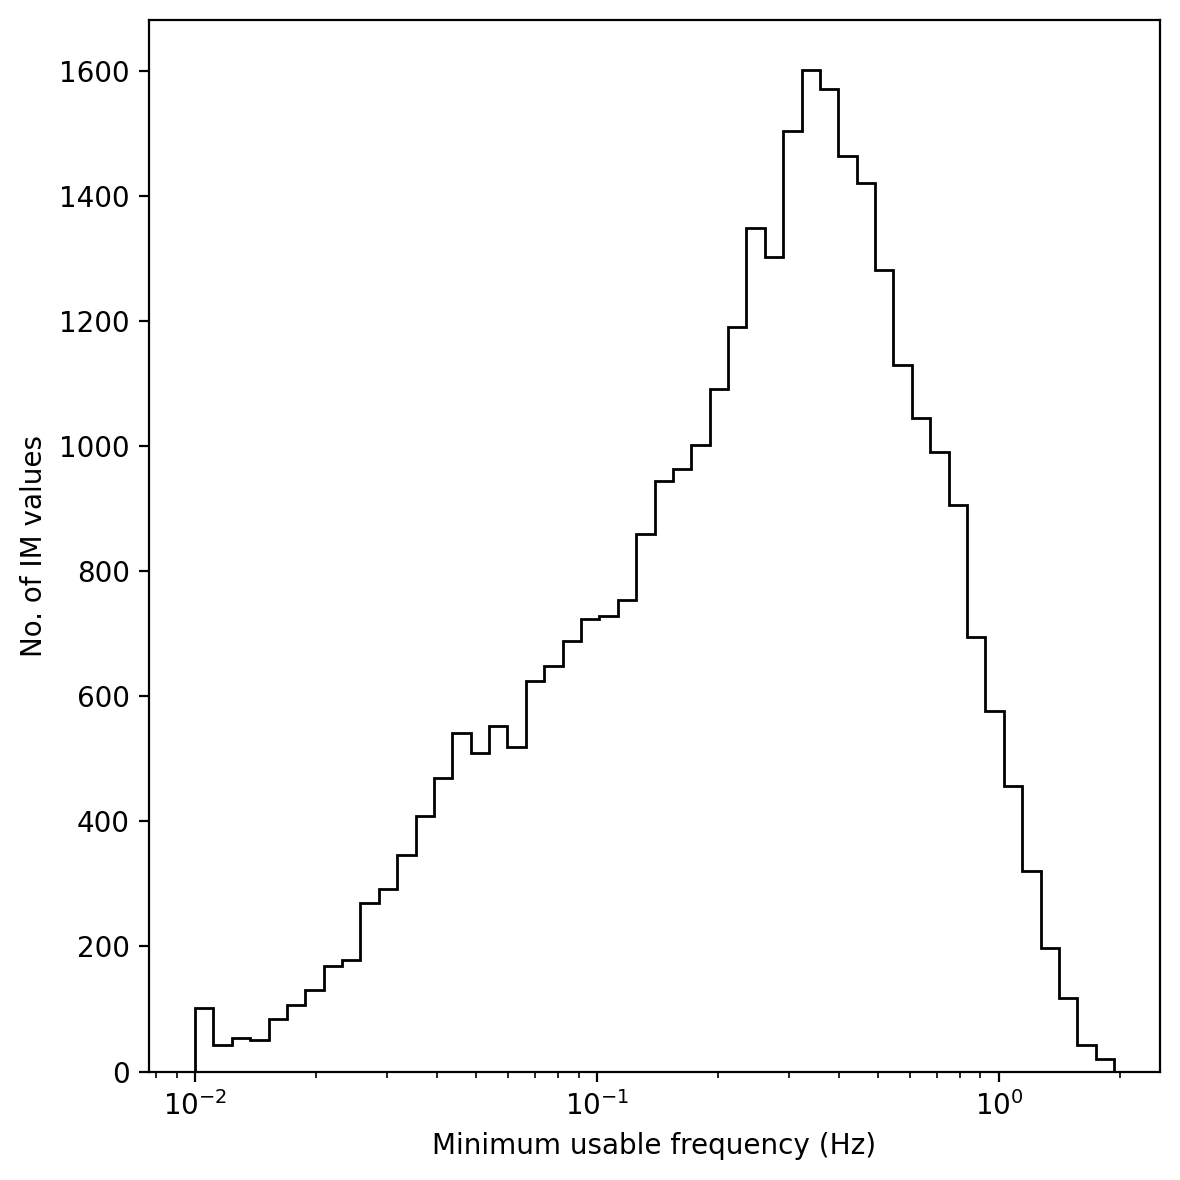

In [27]:
def plot_loghist(x, bins, xlabel, histtype):
    fig,ax = plt.subplots(figsize=(6,6),dpi=200)
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    ax.hist(x, bins=logbins, edgecolor='k', histtype = histtype)
    plt.xscale('log')
    ax.set_ylabel('No. of IM values')
    ax.set_xlabel(xlabel)
#     plt.show()
    
plot_loghist(gm_data['PGA'],50,'PGA (g)','bar')
plt.tight_layout()
plt.savefig(fig_dir+'/obs_PGA.pdf')

plot_loghist(gm_data['PGV'],50,'PGV (m/s)','bar')
plt.tight_layout()
plt.savefig(fig_dir+'/obs_PGV.pdf')

plot_loghist(gm_data['fmin_mean_X'],50,'Minimum usable frequency (Hz)','step')
plt.tight_layout()
plt.savefig(fig_dir+'/obs_freq.pdf')


In [28]:
gm_data.columns

Index(['gmid', 'evid', 'datetime', 'sta', 'loc', 'chan', 'component', 'PGA',
       'PGV', 'CAV',
       ...
       'FAS_53.366992312063125', 'FAS_57.2236765935022',
       'FAS_61.35907273413176', 'FAS_65.79332246575683',
       'FAS_70.54802310718645', 'FAS_75.64633275546291',
       'FAS_81.11308307896873', 'FAS_86.97490026177834',
       'FAS_93.26033468832199', 'FAS_100.0'],
      dtype='object', length=155)

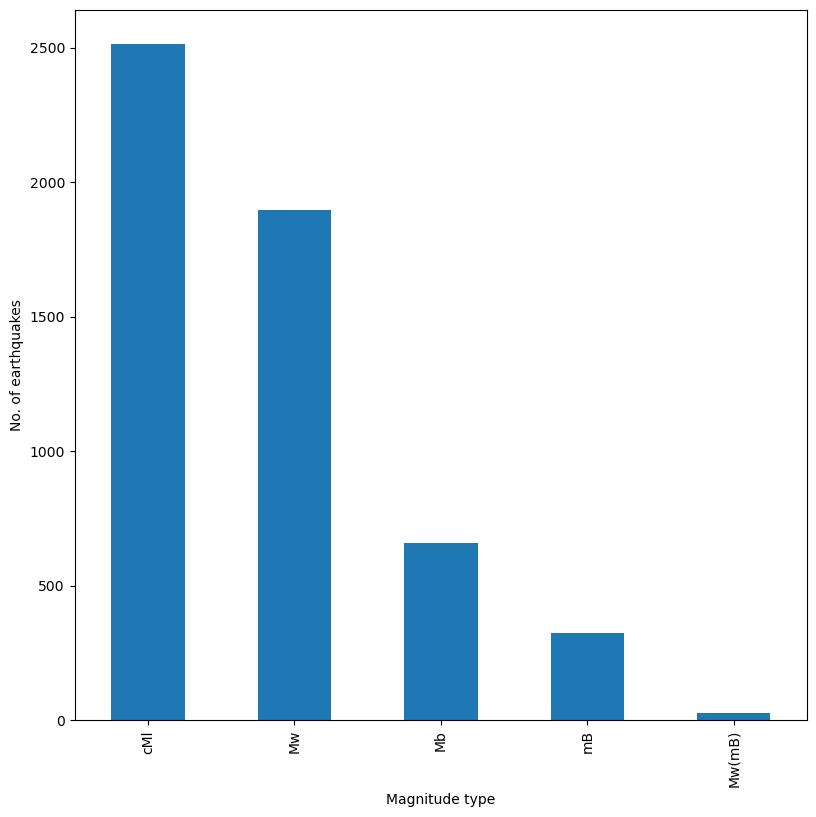

In [29]:
plot_bargraph_with_groupings(data,'mag_type','','Magnitude type','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/mag_type.pdf')

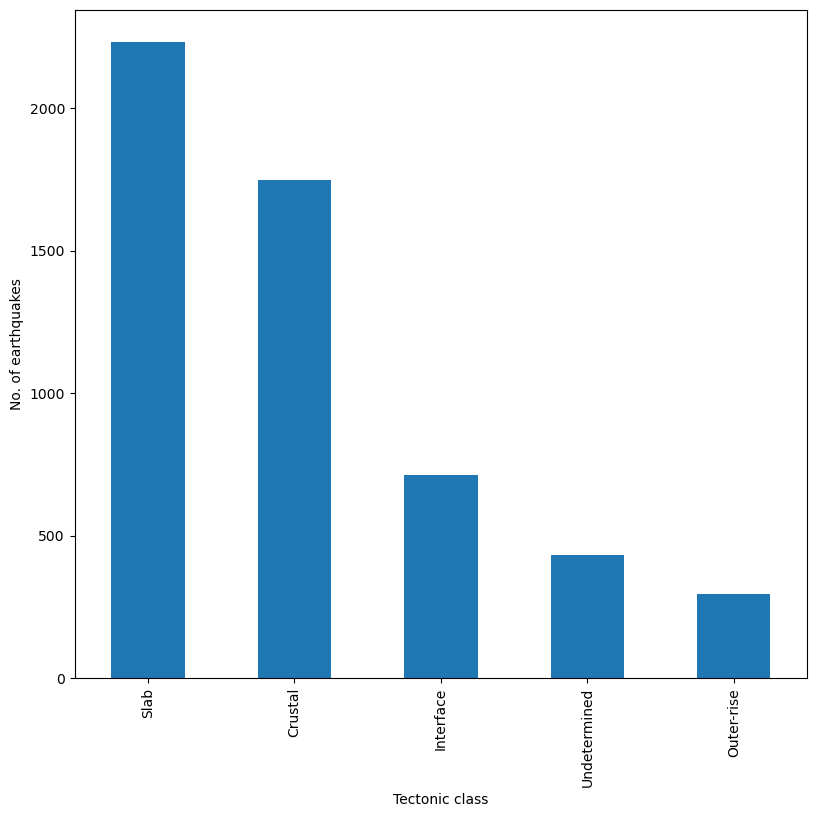

In [30]:
plot_bargraph_with_groupings(data,'tect_class','','Tectonic class','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/tect_class.pdf')

In [31]:
gm_data = pd.read_csv('Tables/ground_motion_im_table_rotd50_flat.csv',low_memory=False)
data = pd.read_csv('Tables/earthquake_source_table.csv')

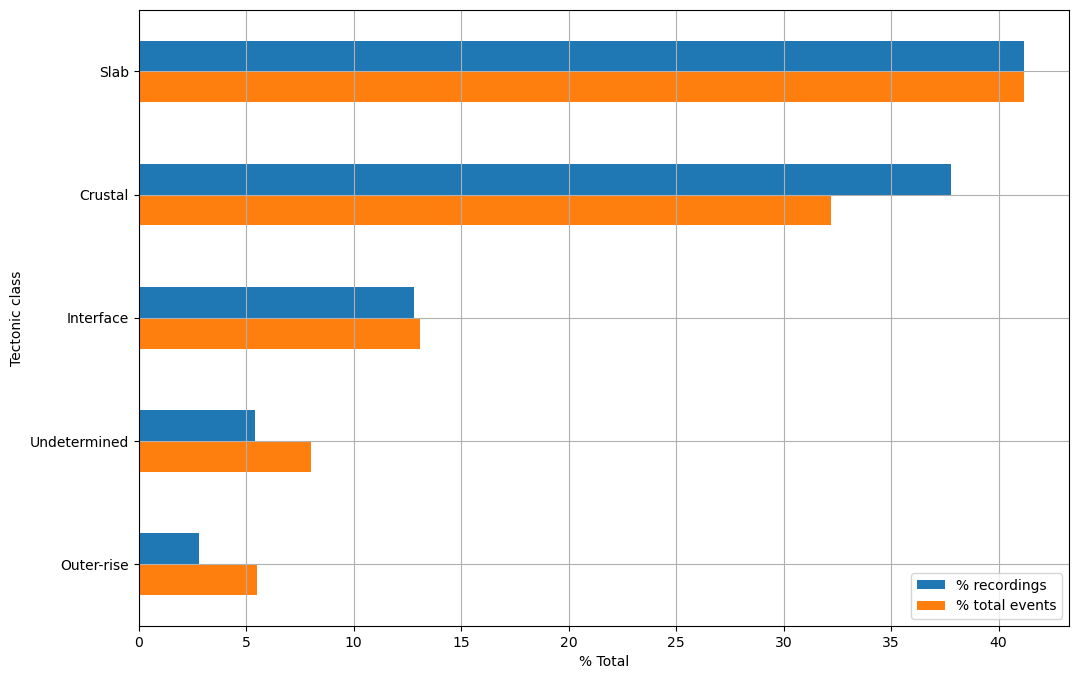

In [32]:
fig, ax = plt.subplots(figsize=(12,8),dpi=100)

grouped = gm_data['tect_class'].value_counts(normalize=True).mul(100).round(1)
grouped.rename('% recordings',inplace=True)
grouped_2 = data['tect_class'].value_counts(normalize=True).mul(100).round(1)
grouped_2.rename('% total events',inplace=True)

grouped_combined = pd.concat((grouped,grouped_2),axis=1)
grouped_combined
grouped_combined.plot.barh(ax=ax)
# grouped_2.plot.barh(ax=ax)
ax.invert_yaxis()
ax.set_xlabel('% Total')
ax.set_ylabel('Tectonic class')
plt.grid()

plt.savefig(fig_dir+'/tect_class_percent.pdf')
# plot_bargraph_with_groupings(gm_data,'tect_class','','Tectonic class','No. of earthquakes')

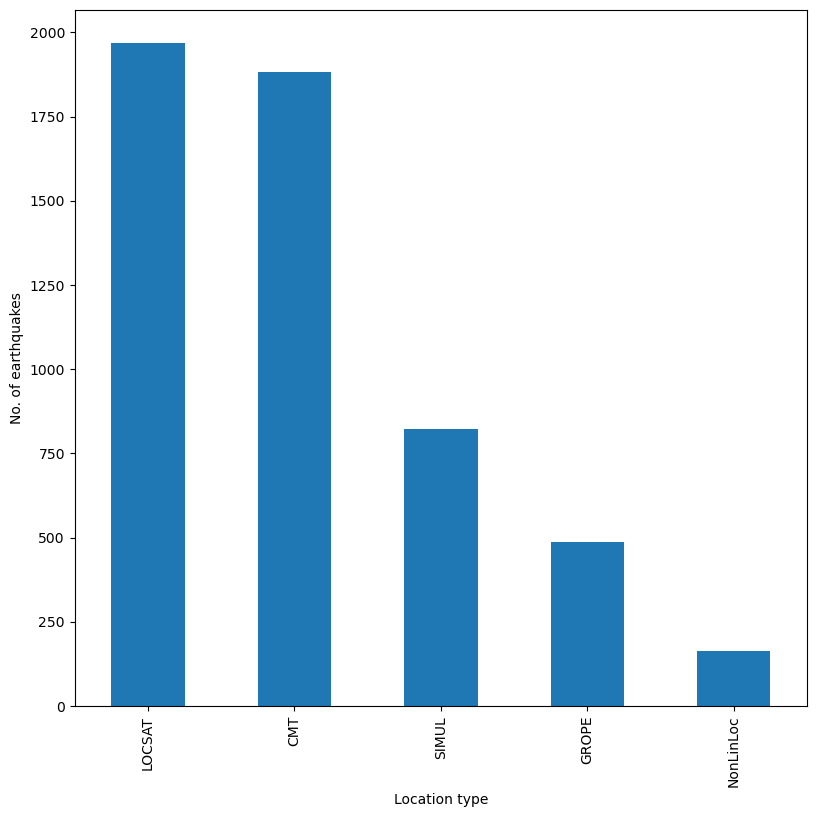

In [33]:
plot_bargraph_with_groupings(data,'loc_type','','Location type','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/loc_type.pdf')

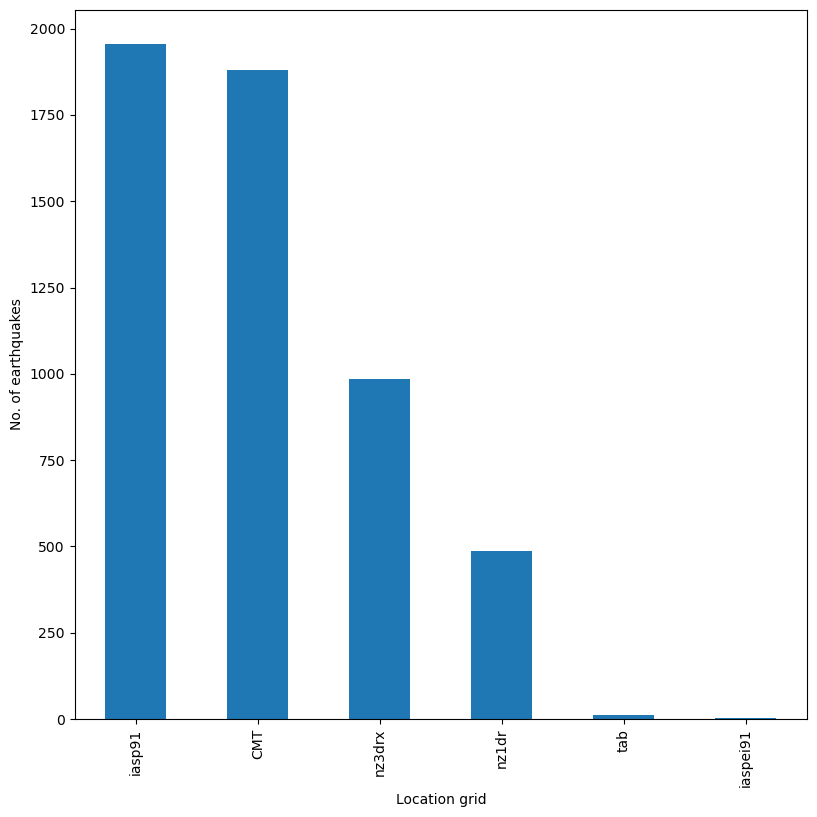

In [34]:
plot_bargraph_with_groupings(data,'loc_grid','','Location grid','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/loc_grid.pdf')

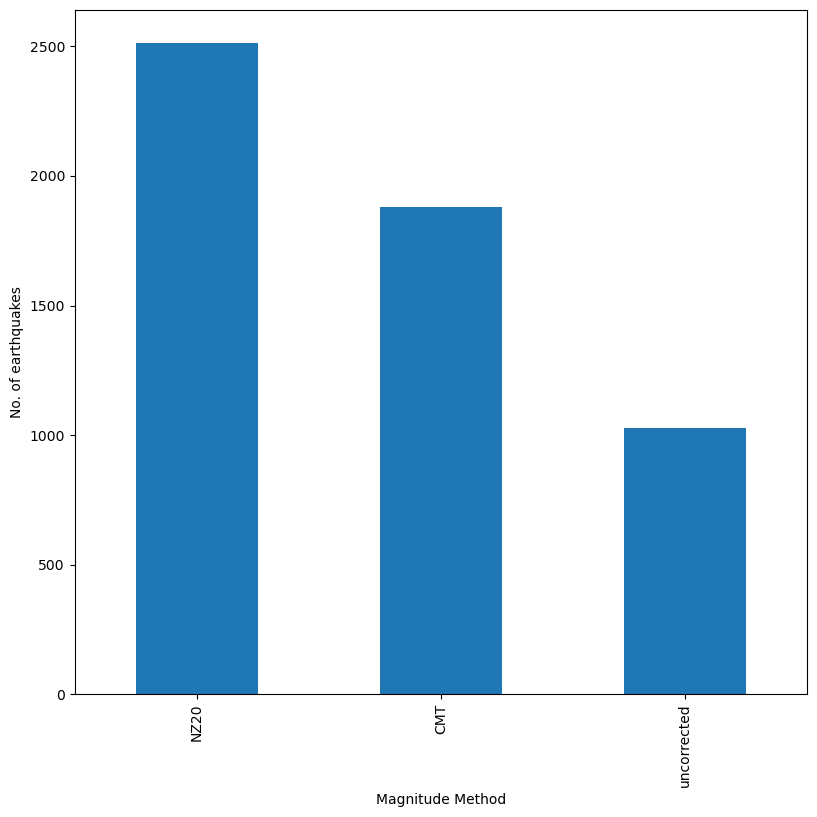

In [35]:
plot_bargraph_with_groupings(data,'mag_method','','Magnitude Method','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/mag_method.pdf')

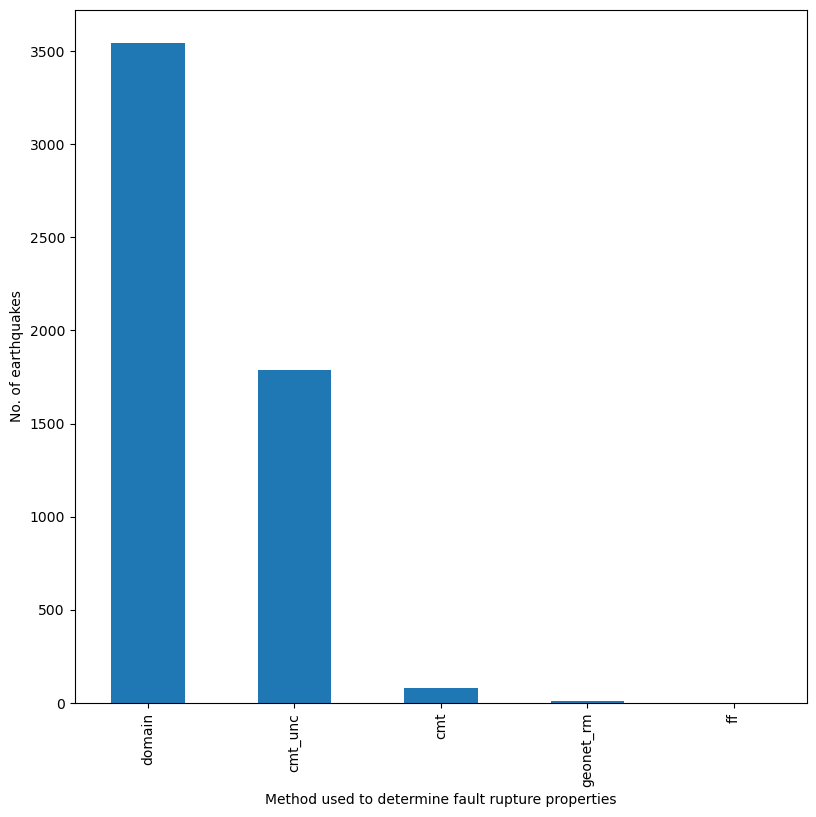

In [36]:
plot_bargraph_with_groupings(data,'f_type','','Method used to determine fault rupture properties','No. of earthquakes')
plt.tight_layout()
plt.savefig(fig_dir+'/f_type.pdf')

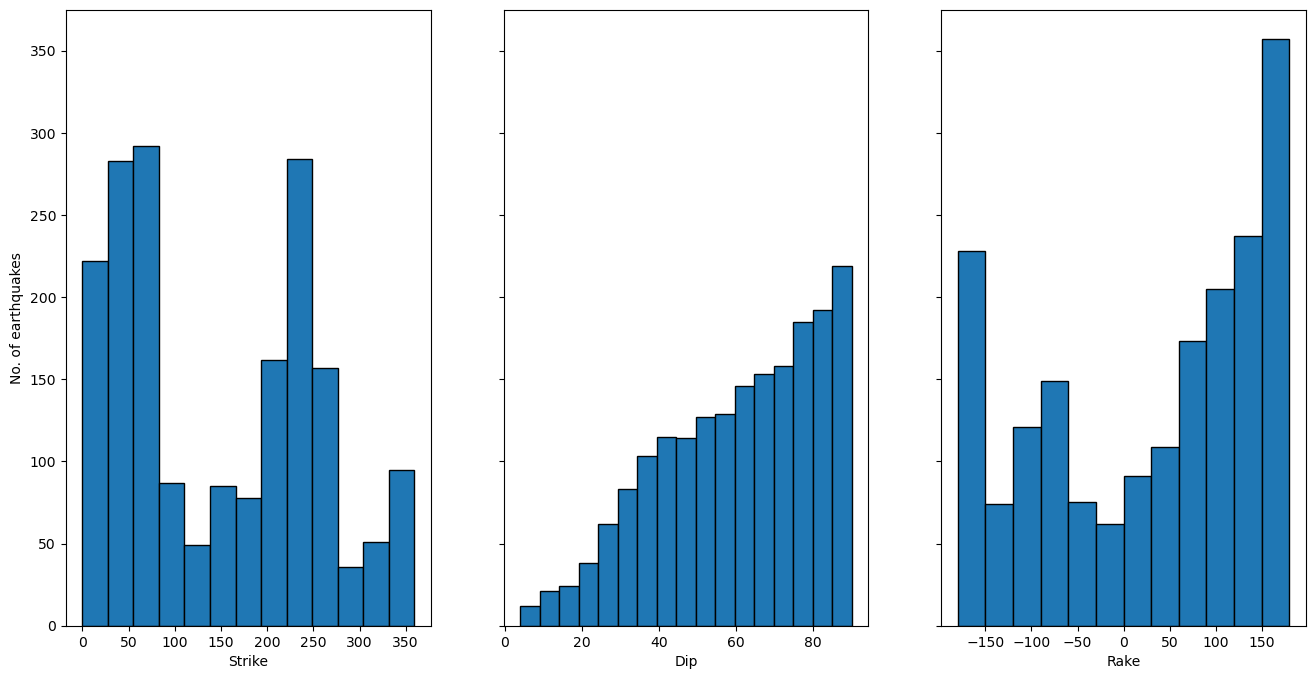

In [37]:
# plot_bargraph_with_groupings(data,'strike','','Strike','No. of earthquakes')
f, axs = plt.subplots(1, 3,figsize=(16,8),sharey=True)
axs[0].hist(data.strike[data.f_type != 'domain'],bins='auto',edgecolor="k",stacked=True)
axs[0].set_xlabel('Strike')

axs[1].hist(data.dip[data.f_type != 'domain'],bins='auto',edgecolor="k",stacked=True)
axs[1].set_xlabel('Dip')

axs[2].hist(data.rake[data.f_type != 'domain'],bins='auto',edgecolor="k",stacked=True)
axs[2].set_xlabel('Rake')

for ax in axs.flat:
    ax.set(ylabel='No. of earthquakes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig(fig_dir+'/SDR.pdf')
plt.show()

In [38]:
data.f_type.unique()

array(['domain', 'cmt_unc', 'geonet_rm', 'cmt', 'ff'], dtype=object)

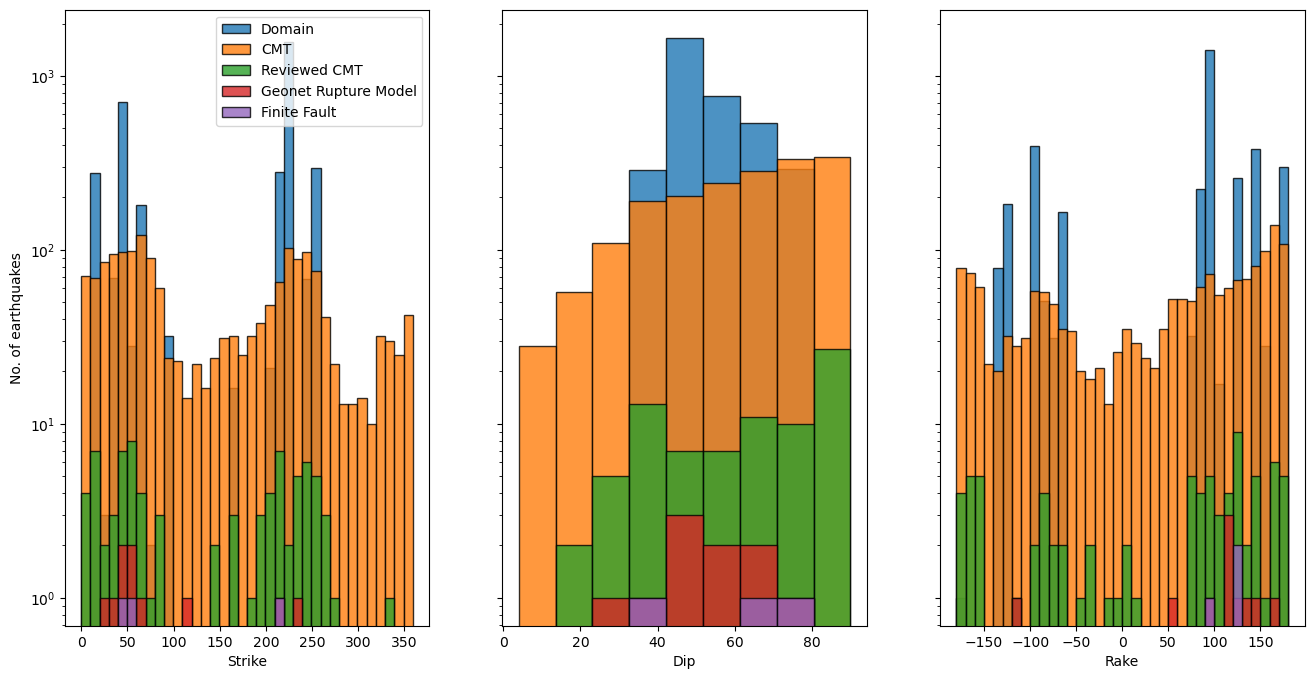

In [39]:
f, axs = plt.subplots(1, 3,figsize=(16,8),sharey=True)
bins = 36
# strike_data = pd.DataFrame([data.strike[data.f_type != 'domain'].values,data.strike[data.f_type == 'domain'].values],columns=['no_domain','domain'])
domain_data = pd.DataFrame(data.strike[data.f_type == 'domain'].values,columns=['Domain'])
cmt_data = pd.DataFrame(data.strike[data.f_type == 'cmt_unc'].values,columns=['CMT'])
reviewed_data = pd.DataFrame(data.strike[data.f_type == 'cmt'].values,columns=['Reviewed CMT'])
ff_data = pd.DataFrame(data.strike[data.f_type == 'ff'].values,columns=['Finite Fault'])
geonet_data = pd.DataFrame(data.strike[data.f_type == 'geonet_rm'].values,columns=['Geonet Rupture Model'])

data_in = pd.concat([domain_data,cmt_data,reviewed_data,geonet_data,ff_data])
data_in.plot.hist(bins=36,density=False,ax=axs[0],edgecolor="k",alpha=0.8)
axs[0].set_xlabel('Strike')
# axs[0].hist(data.strike[data.f_type != 'domain'],bins=bins,edgecolor="k",stacked=True)
# axs[0].hist(data.strike[data.f_type == 'domain'],bins=bins,edgecolor="k",stacked=True)

# axs[1].hist(data.dip[data.f_type != 'domain'],bins='auto',edgecolor="k",stacked=True)
# axs[1].hist(data.dip[data.f_type == 'domain'],bins='auto',edgecolor="k",stacked=True)
domain_data = pd.DataFrame(data.dip[data.f_type == 'domain'].values,columns=['Domain'])
cmt_data = pd.DataFrame(data.dip[data.f_type == 'cmt_unc'].values,columns=['CMT'])
reviewed_data = pd.DataFrame(data.dip[data.f_type == 'cmt'].values,columns=['Reviewed CMT'])
ff_data = pd.DataFrame(data.dip[data.f_type == 'ff'].values,columns=['Finite Fault'])
geonet_data = pd.DataFrame(data.dip[data.f_type == 'geonet_rm'].values,columns=['Geonet Rupture Model'])

data_in = pd.concat([domain_data,cmt_data,reviewed_data,geonet_data,ff_data])
data_in.plot.hist(bins=9,density=False,ax=axs[1],edgecolor="k",legend=False,alpha=0.8)
axs[1].set_xlabel('Dip')

# axs[2].hist(data.rake[data.f_type != 'domain'],bins='auto',edgecolor="k",stacked=True)
# axs[2].hist(data.rake[data.f_type == 'domain'],bins='auto',edgecolor="k",stacked=True)
domain_data = pd.DataFrame(data.rake[data.f_type == 'domain'].values,columns=['Domain'])
cmt_data = pd.DataFrame(data.rake[data.f_type == 'cmt_unc'].values,columns=['CMT'])
reviewed_data = pd.DataFrame(data.rake[data.f_type == 'cmt'].values,columns=['Reviewed CMT'])
ff_data = pd.DataFrame(data.rake[data.f_type == 'ff'].values,columns=['Finite Fault'])
geonet_data = pd.DataFrame(data.rake[data.f_type == 'geonet_rm'].values,columns=['Geonet Rupture Model'])

data_in = pd.concat([domain_data,cmt_data,reviewed_data,geonet_data,ff_data])
data_in.plot.hist(bins=36,density=False,ax=axs[2],edgecolor="k",legend=False,alpha=0.8)
axs[2].set_xlabel('Rake')


for ax in axs.flat:
    ax.set(ylabel='No. of earthquakes')
#     ax.set_yscale('log')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.yscale('log')
plt.savefig(fig_dir+'/SDR.pdf')
plt.show()

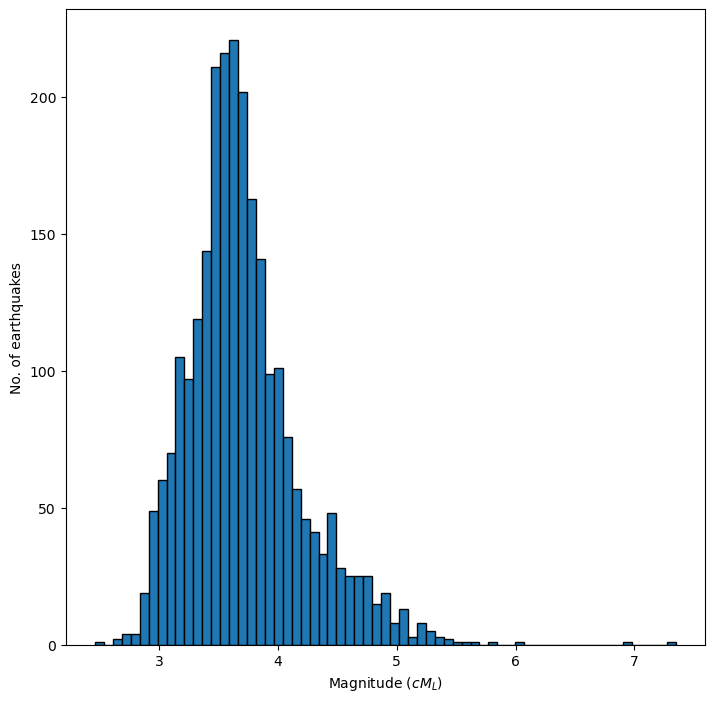

In [40]:
f, ax = plt.subplots(1, 1,figsize=(8.25,8.25))
ax.hist(data.mag[data.mag_type == 'cMl'],bins='auto',edgecolor="k")
ax.set_xlabel('Magnitude ($cM_{L}$)')
ax.set_ylabel('No. of earthquakes')
plt.savefig(fig_dir+'/cml_mag_dist.pdf')
plt.show()

In [41]:
data.columns
data.tect_class.unique()

array(['Slab', 'Crustal', 'Undetermined', 'Interface', 'Outer-rise'],
      dtype=object)

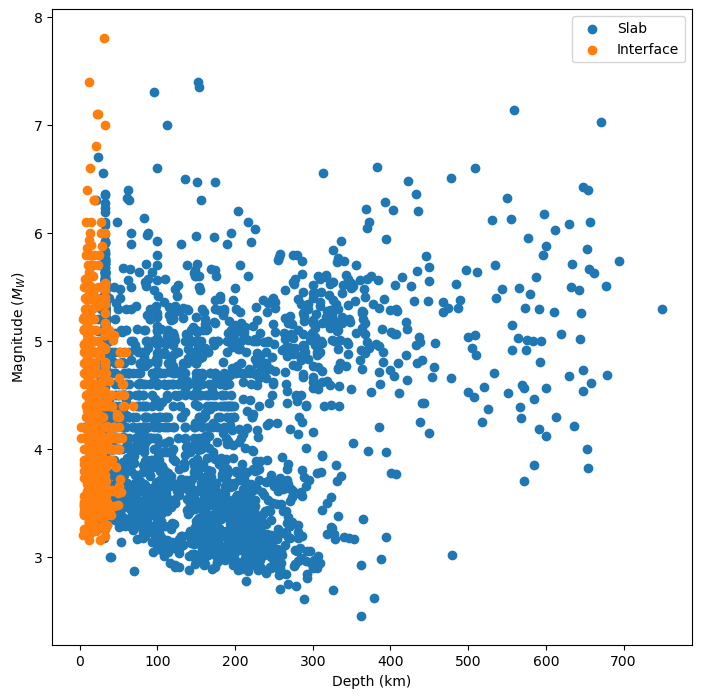

In [42]:
f, ax = plt.subplots(1, 1,figsize=(8.25,8.25),dpi=100)
int_mask = data['tect_class'] == 'Interface'
slab_mask = data['tect_class'] == 'Slab'
crust_mask = data['tect_class'] == 'Crustal'
ax.scatter(data.depth[slab_mask],data.mag[slab_mask],label='Slab')
ax.scatter(data.depth[int_mask],data.mag[int_mask],label='Interface')
# ax.scatter(data.depth[crust_mask],data.mag[crust_mask],label='Crustal')
plt.legend(loc='upper right')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('Magnitude ($M_{W}$)')
plt.savefig(fig_dir+'/mag_depth.pdf')
plt.show()

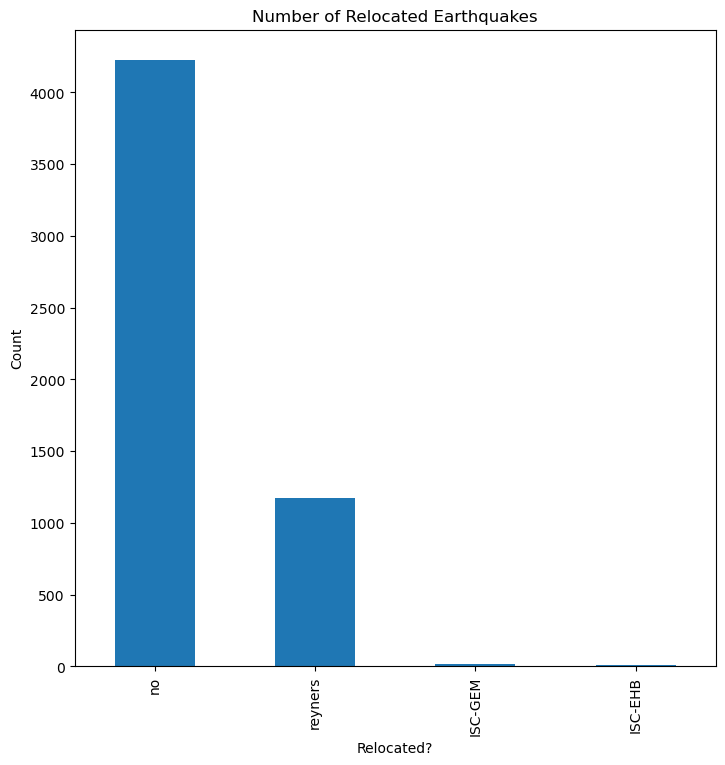

In [43]:
plot_bargraph_with_groupings(data,'reloc','Number of Relocated Earthquakes','Relocated?','Count')
plt.savefig(fig_dir+'/relocated.pdf')

/var/folders/qb/b2j2r0pn71n63kdftft4qvwc0000gq/T/ipykernel_2518/4097166914.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby([data.datetime.dt.year]).mean()


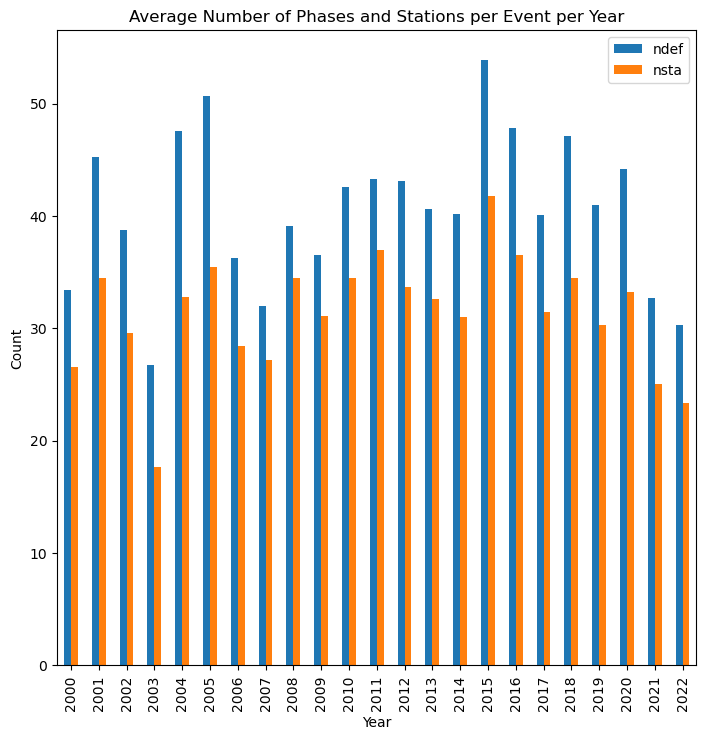

In [44]:
data['datetime'] = pd.to_datetime(data.datetime)
data_grouped = data.groupby([data.datetime.dt.year]).mean()
data_grouped.plot(kind='bar',
          y=['ndef','nsta'],
          figsize=(8.25,8.25),
          title='Average Number of Phases and Stations per Event per Year',
          xlabel='Year',
          ylabel='Count')
plt.savefig(fig_dir+'/ndef_nsta.pdf')

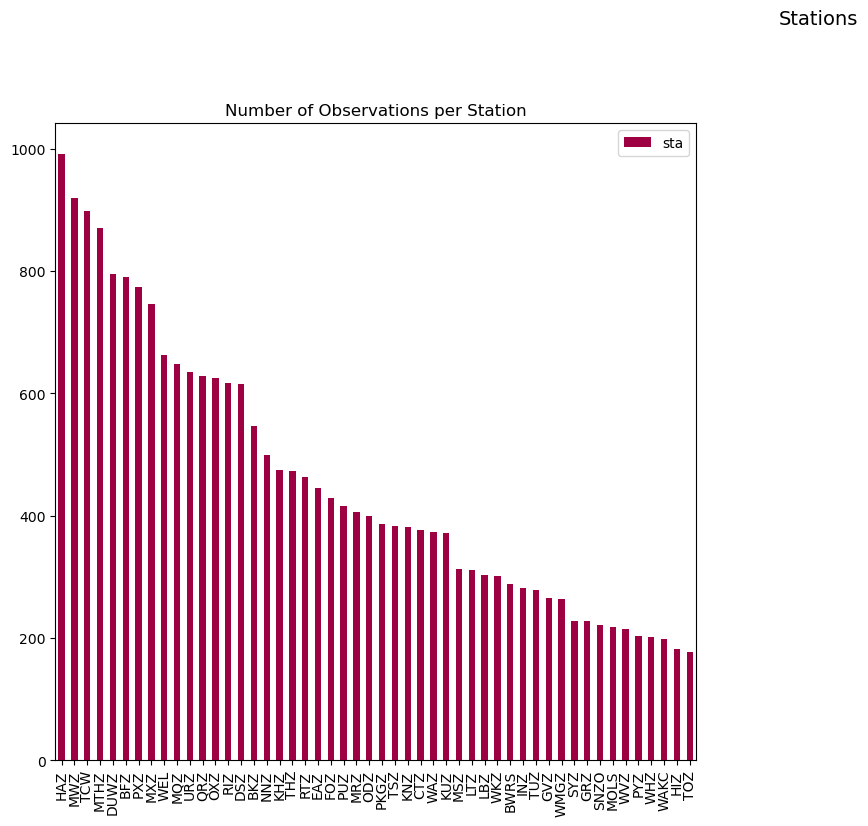

In [45]:
from matplotlib import cm

cmap = cm.get_cmap('Spectral')

FIG_SIZE = (8.27,8.27)
xlabel = 'Station'
ylabel = 'Number of Observations'
title = 'Number of Observations per Station'

# fig, axes = plt.subplots(nrows=1, ncols=2)
# ax1 = axes[0]
# ax2 = axes[1]
textstr='Stations'
ax = gm_data['sta'].value_counts().nlargest(50).plot(kind='bar',
                                         figsize=FIG_SIZE,
                                         title=title,
                                         cmap=cmap)
plt.gcf().text(1, 1, textstr, fontsize=14)
ax.legend()
# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)

In [46]:
sta_data.groupby('Q_Z1.0').count()

net  sta  lat  lon  elev  site_class  Vs30  Vs30_std  Q_Vs30  \
Q_Z1.0                                                                 
Q1       11   11   11   11    11          11    11        11      11   
Q2       70   70   70   70    70          70    70        70      70   
Q3      591  591  591  591   591         591   591       591     591   

        Vs30_Ref  ...  T0_ref  Z1.0  Z1.0_std  Z1.0_ref  Z2.5  Z2.5_std  \
Q_Z1.0            ...                                                     
Q1            11  ...      11    11        11        11    11        11   
Q2            70  ...      70    70        70        70    70        70   
Q3           591  ...     591   591       591       591   591       591   

        Q_Z2.5  Z2.5_ref  site_domain_no  basin  
Q_Z1.0                                           
Q1          11        11              11     11  
Q2          70        70              70     70  
Q3         591       591             591    591  

[3 rows x 24 columns]

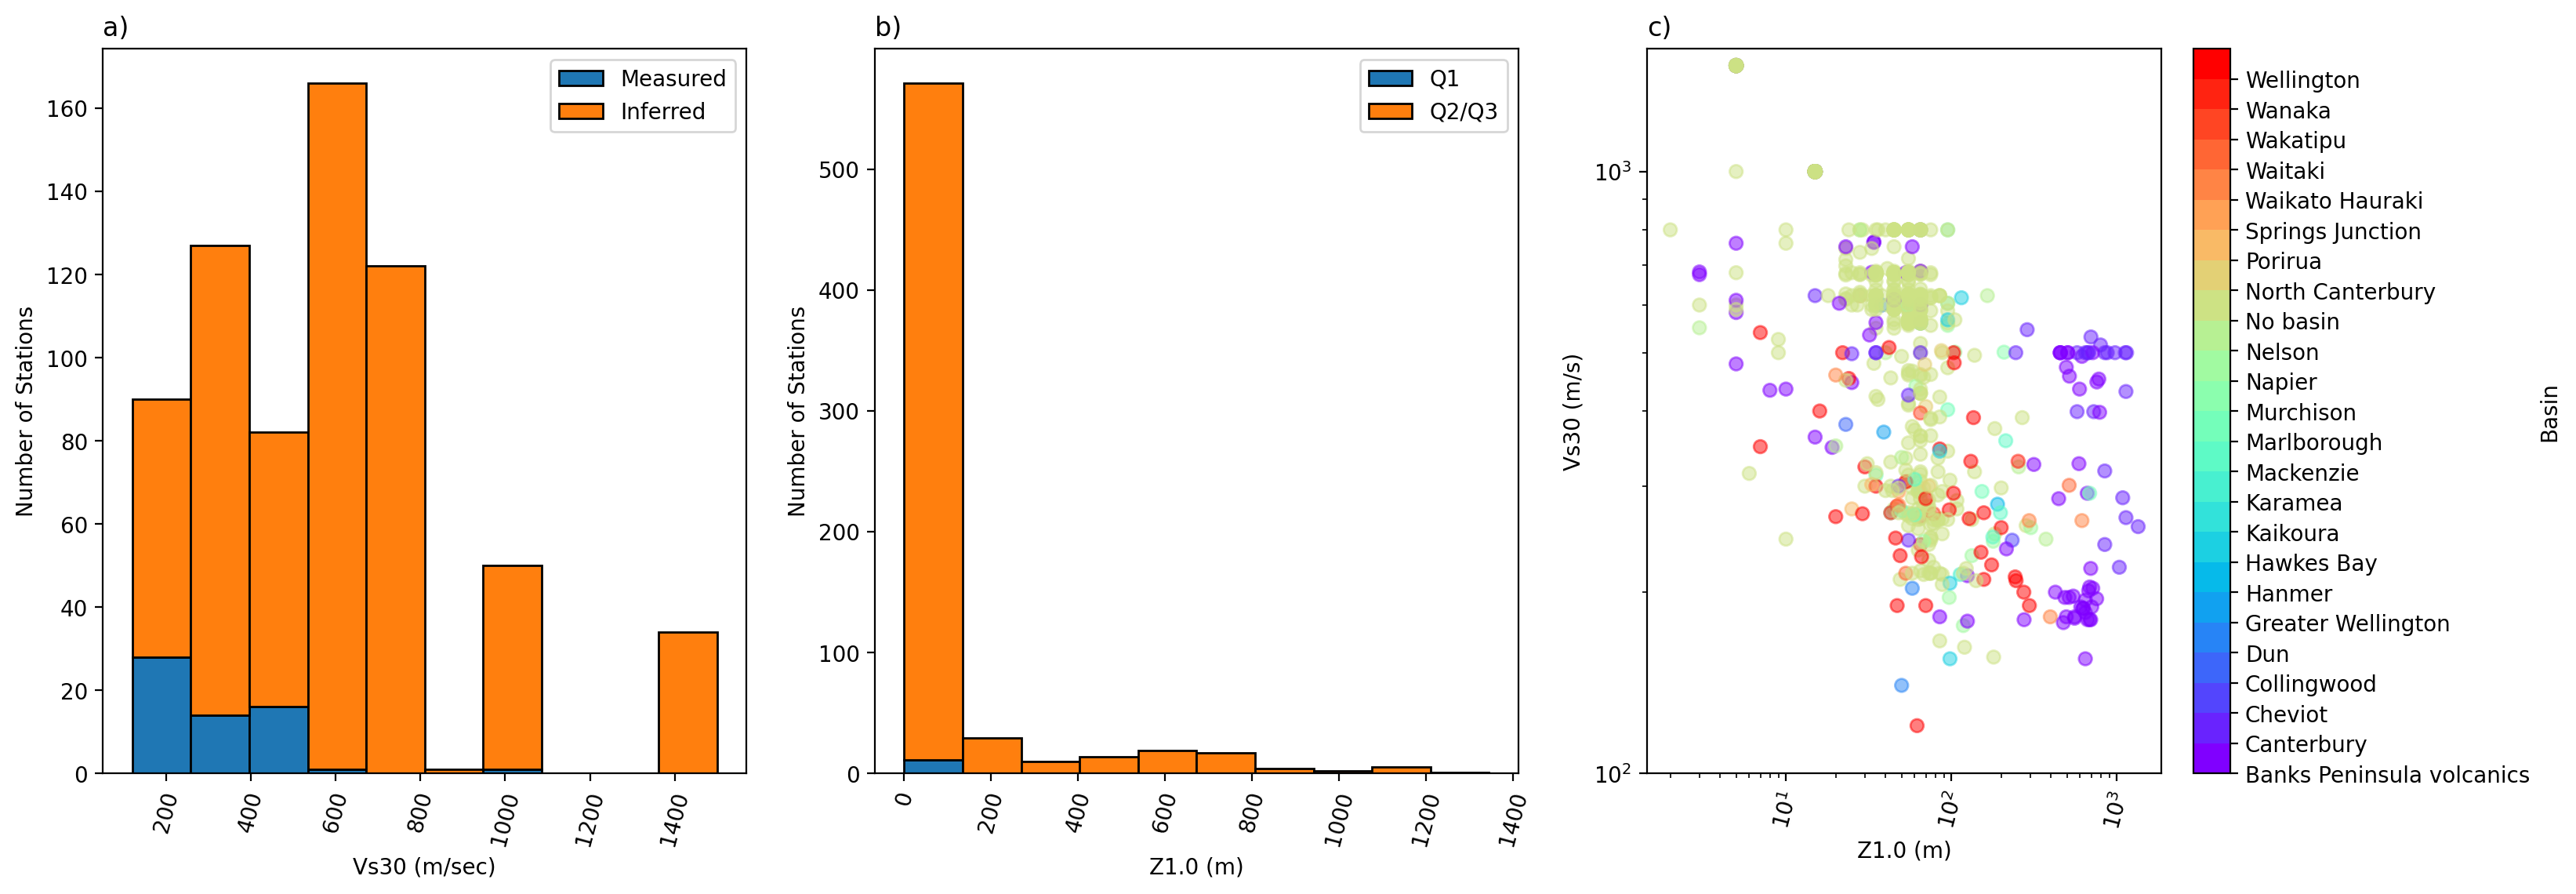

In [47]:
fig, axs = plt.subplots(1, 3,figsize=(18,6),dpi=200)


xlabel = 'Vs30 (m/sec)'
ylabel = 'Number of Stations'
title = 'Frequency of Stations with Observed Vs30 Values'

# ax = sta_data['Vs30_preferred'].value_counts().sort_index().plot(kind='bar',
#                                          figsize=FIG_SIZE,
#                                          title=title)
mask = sta_data.Q_Vs30 == 'Q1'
axs[0].hist([sta_data['Vs30'][mask],sta_data['Vs30'][~mask]],edgecolor='k',stacked=True,label=['Measured','Inferred'])
axs[0].legend(prop={'size': 10})
axs[0].set_xlabel(xlabel)
axs[0].set_ylabel(ylabel)
axs[0].tick_params(axis='x',labelrotation=75)
axs[0].set_title('a)',loc='left')

xlabel = 'Z1.0 (m)'
ylabel = 'Number of Stations'
title = 'Frequency of Stations with Observed Z1.0 values'

# ax = sta_data['Vs30_preferred'].value_counts().sort_index().plot(kind='bar',
#                                          figsize=FIG_SIZE,
#                                          title=title)
mask = sta_data['Q_Z1.0'] == 'Q1'
axs[1].hist([sta_data['Z1.0'][mask],sta_data['Z1.0'][~mask]],bins=10,stacked=True,edgecolor="k",label=['Q1','Q2/Q3'])
axs[1].legend(prop={'size': 10})
axs[1].set_xlabel(xlabel)
axs[1].set_ylabel(ylabel)
axs[1].tick_params(axis='x',labelrotation=75)
axs[1].set_title('b)',loc='left')

xlabel = 'Z1.0 (m)'
ylabel = 'Vs30 (m/s)'
title = 'Frequency of Stations with Observed Z1.0 values'


from matplotlib import cm, colors
sta_data['basin'] = sta_data.basin.astype(dtype='category')
basin_labels = np.stack([sta_data.basin.cat.codes.astype(int).unique(),sta_data.basin.unique().tolist()],axis=1)
basin_labels = basin_labels[basin_labels[:,0].astype('int').argsort()]
bars = len(sta_data.basin.cat.codes.astype(int).unique())
norm = colors.Normalize(0,bars)
# # # norm = sta_data['site_domain_no'] / sta_data['site_domain_no'].max()
cmap = cm.get_cmap('rainbow',bars)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=axs[2],label='Basin')
# # ticks = np.arange(sta_data['basin'].min(),sta_data['basin'].max(),1)
ticks = basin_labels[:,0].astype('int')
# print(sta_data.basin.cat.codes.astype(int).unique()+1)
cbar.set_ticks(ticks)
cbar.set_ticklabels(basin_labels[:,1])
axs[2].scatter(sta_data['Z1.0'],sta_data['Vs30'],c=sta_data.basin.cat.codes.astype(int),cmap=cmap,alpha=0.5)
axs[2].set_xlabel(xlabel)
axs[2].set_ylabel(ylabel)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_ylim(10**2,sta_data['Vs30'].max()+100)
axs[2].tick_params(axis='x',labelrotation=75)
axs[2].set_title('c)',loc='left')

plt.savefig(fig_dir+'/z10_vs_vs30.pdf')

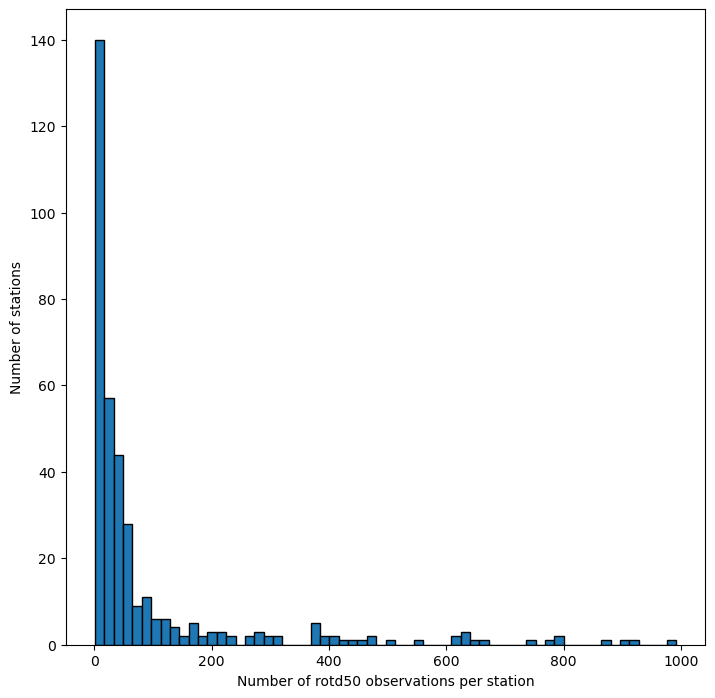

In [48]:
bin_count = 20
gm_data = pd.read_csv('Tables/ground_motion_im_table_rotd50.csv',low_memory=False)
num_obs = gm_data['sta'].value_counts().values
# bins = np.linspace(num_obs.min(),num_obs.max(),20)

# hist, edges = np.histogram(num_obs,bins=20)

# digitized = np.digitize(num_obs,bins,right=True)
# bin_count = [len(num_obs[digitized == i]) for i in range(0,len(bins))]

# # bin_means = (np.histogram(num_obs,bins,weights=num_obs)[0] / np.histogram(num_obs,bins)[0])

f, ax = plt.subplots(1, 1,figsize=(8.25,8.25))
# ax.bar(edges,hist,edgecolor="k",color=[0.25,0.25,0.25],width=bins[1]-bins[0]/2)
ax.hist(num_obs,bins='auto',edgecolor="k")
ax.set_xlabel('Number of rotd50 observations per station')
ax.set_ylabel('Number of stations')
plt.savefig(fig_dir+'/obs_per_sta.pdf')
plt.show()

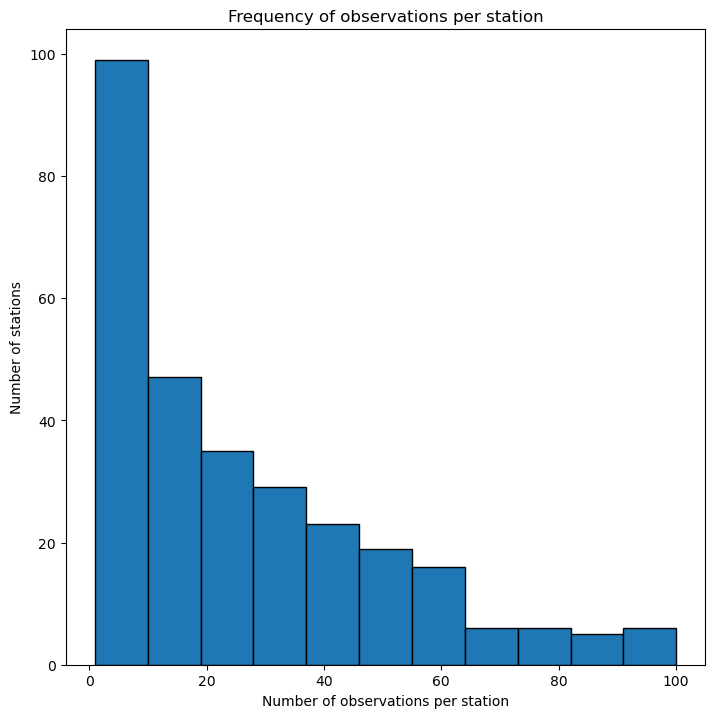

In [49]:
num_obs = gm_data['sta'].value_counts().values[gm_data['sta'].value_counts().values <= 100]
f, ax = plt.subplots(1, 1,figsize=(8.25,8.25))
ax.hist(num_obs,bins='auto',edgecolor="k")
ax.set_xlabel('Number of observations per station')
ax.set_ylabel('Number of stations')
ax.set_title('Frequency of observations per station')
plt.savefig(fig_dir+'/obs_per_sta_100.pdf')
plt.show()

In [50]:
# Subset Data Set
prop_data = pd.read_csv('Tables/propagation_path_table.csv',low_memory=False)
mag_data = pd.read_csv('Tables/station_magnitude_table.csv',low_memory=False)

# Complete Data Set
# prop_data = pd.read_csv('/Volumes/SeaJade 2 Backup/NZ/NZ_EQ_Catalog/converted_output/propagation_path_table.csv',low_memory=False)
# mag_data = pd.read_csv('/Volumes/SeaJade 2 Backup/NZ/NZ_EQ_Catalog/converted_output/station_magnitude_table.csv',low_memory=False)


In [51]:
merged_data = prop_data.set_index(prop_data['evid'].astype('str')+prop_data['net'].astype('str')+prop_data['sta'].astype('str')).merge(mag_data.set_index(mag_data['evid'].astype('str')+mag_data['net'].astype('str')+mag_data['sta'].astype('str'))['mag'],left_index=True,right_index=True).reset_index(drop=True)


In [52]:
merged_data

evid net   sta       r_epi       r_hyp        r_jb       r_rup  \
0       1476956  NZ   DSZ  511.668368  511.699562  511.310854  511.345805   
1       1476956  NZ   DSZ  511.668368  511.699562  511.310854  511.345805   
2       1476956  NZ   DSZ  511.668368  511.699562  511.310854  511.345805   
3       1476956  NZ   LMZ  209.963525  210.023289  209.616600  209.684570   
4       1476956  NZ   LTZ  463.430209  463.464625  462.923212  462.961790   
...         ...  ..   ...         ...         ...         ...         ...   
976384  3769220  NZ  ROLC    7.888410   11.542802    7.869189   11.222268   
976385  3769220  NZ  ROLC    7.888410   11.542802    7.869189   11.222268   
976386  3769220  NZ  TPLC   12.716124   15.247077   12.566906   14.890213   
976387  3769220  NZ  TPLC   12.716124   15.247077   12.566906   14.890213   
976388  3769220  NZ  TPLC   12.716124   15.247077   12.566906   14.890213   

               r_x         r_y  r_tvz  r_xvf          az        b_az reloc  \
0        10.016325 -509.451841    0.0    NaN   44.961816  221.968335    no   
1        10.016325 -509.451841    0.0    NaN   44.961816  221.968335    no   
2        10.016325 -509.451841    0.0    NaN   44.961816  221.968335    no   
3         1.144524 -209.116528    0.0    NaN   44.151310  222.879436    no   
4       114.392931 -440.063817    0.0    NaN   58.141571  234.796332    no   
...            ...         ...    ...    ...         ...         ...   ...   
976384   -7.841262   -0.705102    0.0    NaN  336.581165  156.607995    no   
976385   -7.841262   -0.705102    0.0    NaN  336.581165  156.607995    no   
976386   -8.352416   -9.434953    0.0    NaN   19.254621  199.218776    no   
976387   -8.352416   -9.434953    0.0    NaN   19.254621  199.218776    no   
976388   -8.352416   -9.434953    0.0    NaN   19.254621  199.218776    no   

        f_type    mag  
0       domain    NaN  
1       domain    NaN  
2       domain    NaN  
3       domain  3.632  
4       domain  3.560  
...        ...    ...  
976384  domain    NaN  
976385  domain    NaN  
976386  domain    NaN  
976387  domain    NaN  
976388  domain    NaN  

[976389 rows x 16 columns]

In [53]:
merged_data = gm_data.set_index(gm_data['evid'].astype('str')+gm_data['sta'].astype('str')).merge(mag_data.set_index(mag_data['evid'].astype('str')+mag_data['sta'].astype('str'))['mag'],left_index=True,right_index=True,suffixes=('_gm','_sta')).reset_index(drop=True)

merged_data.columns
print(len(gm_data),len(merged_data))

33026 82944


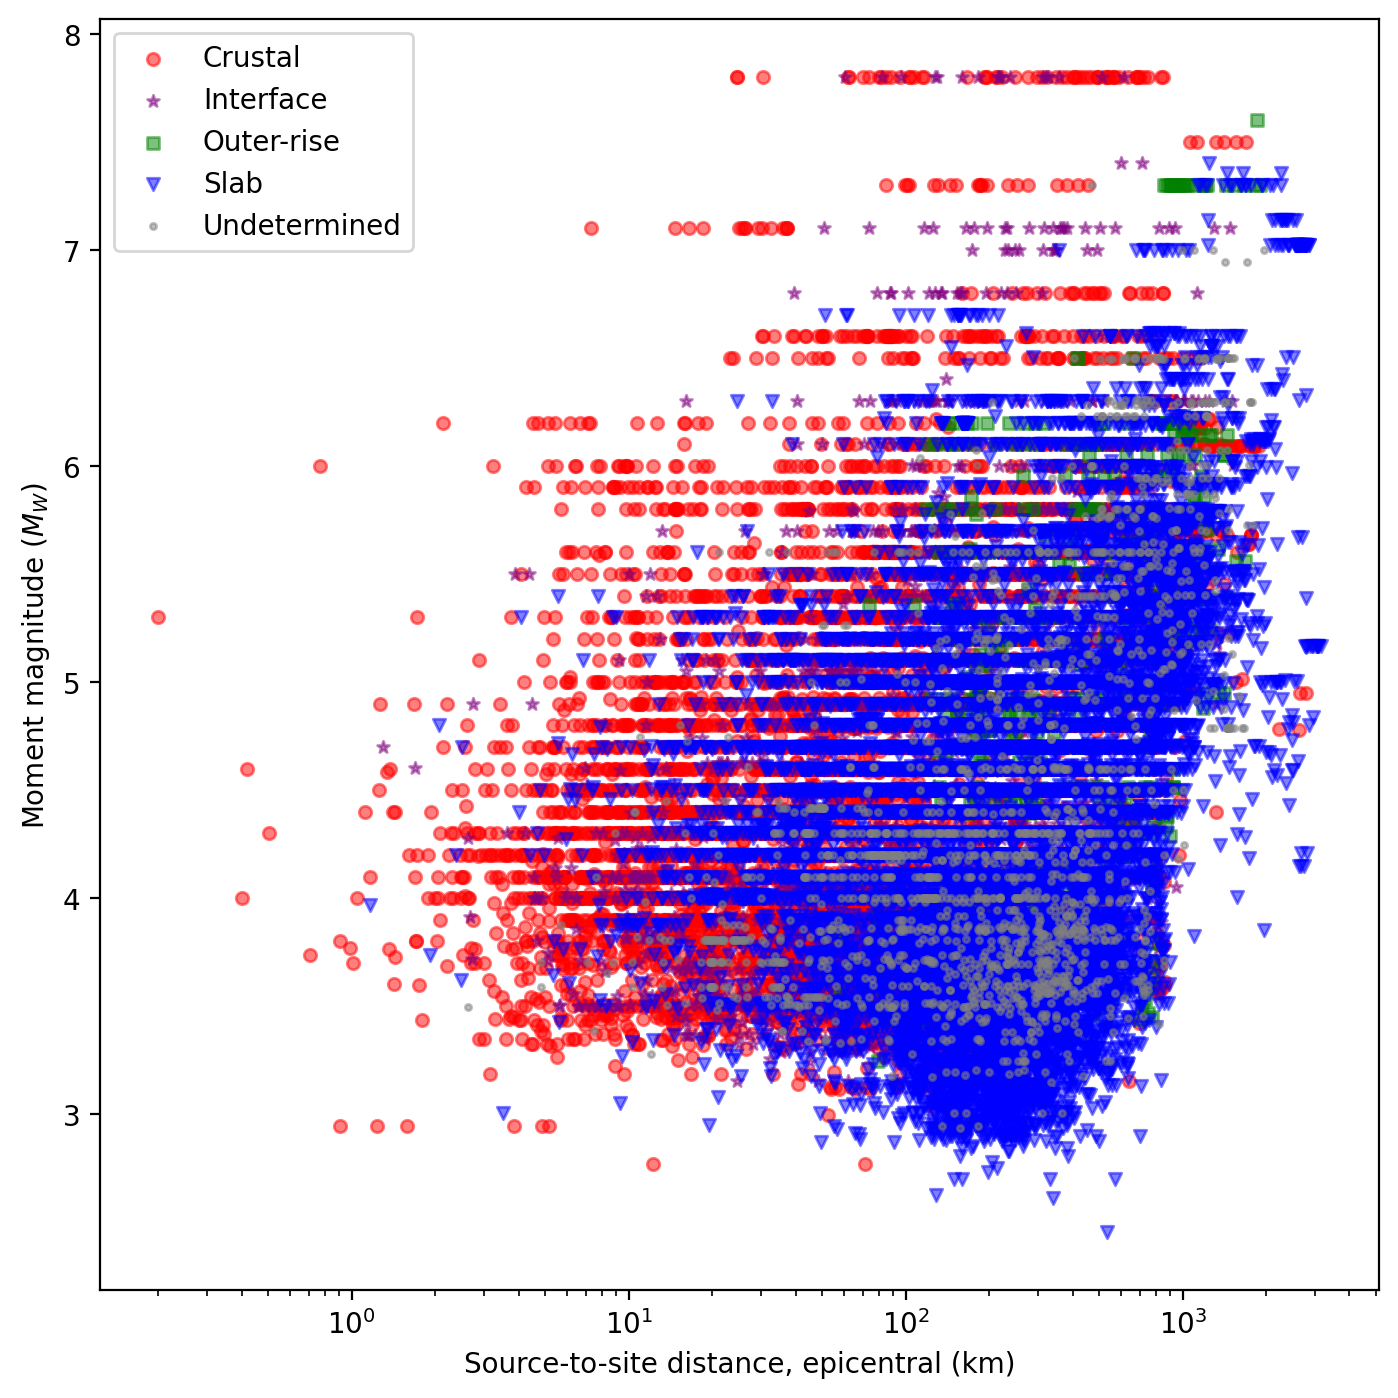

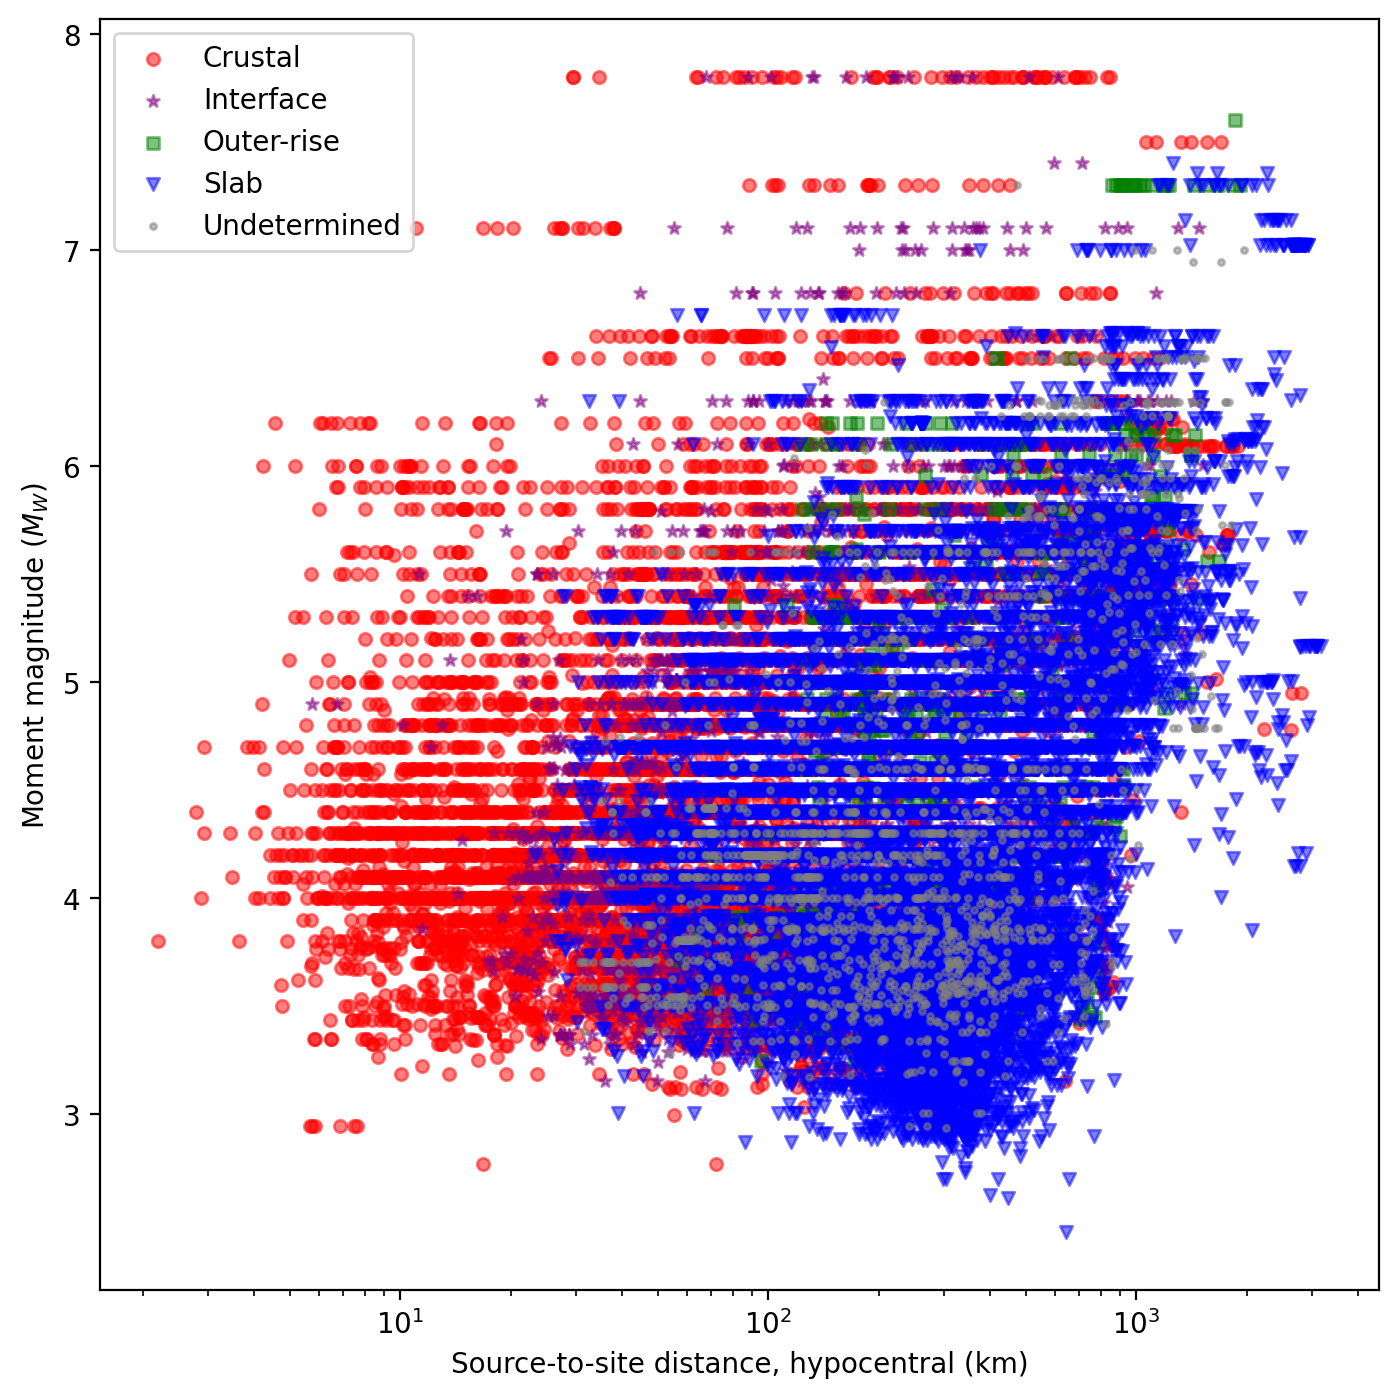

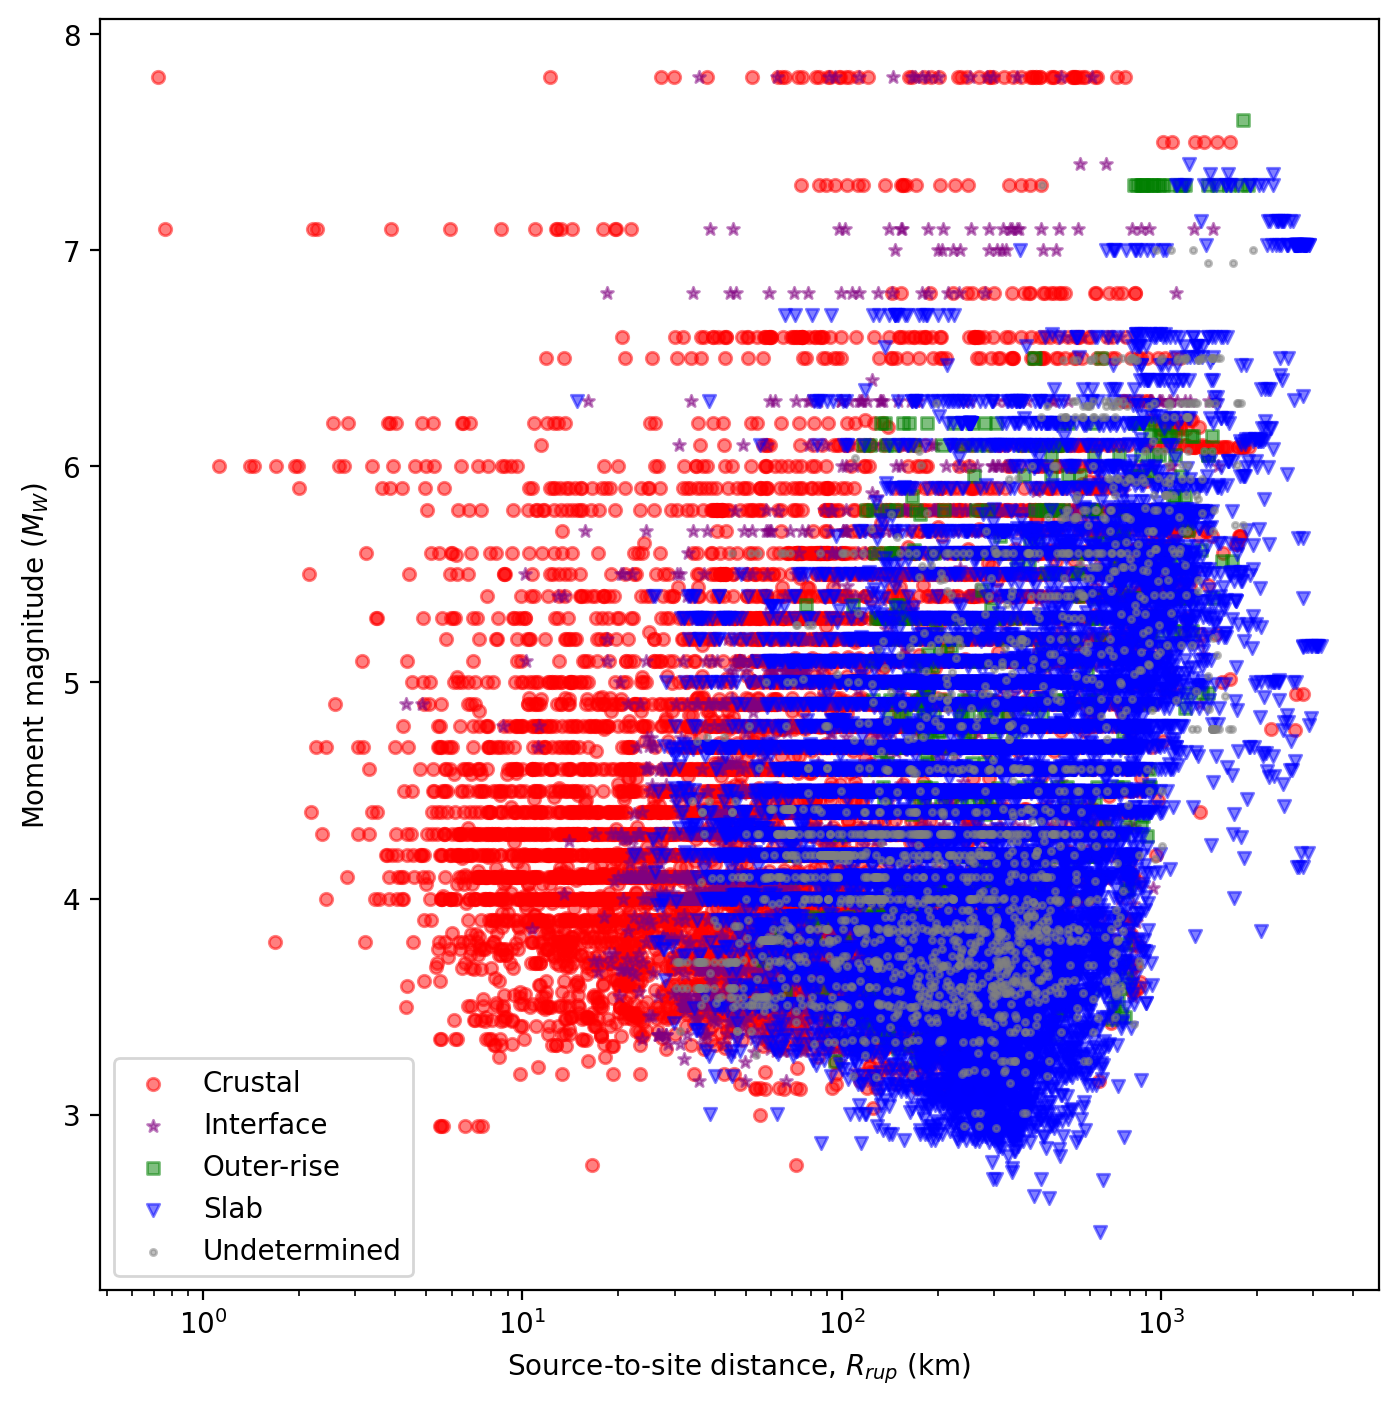

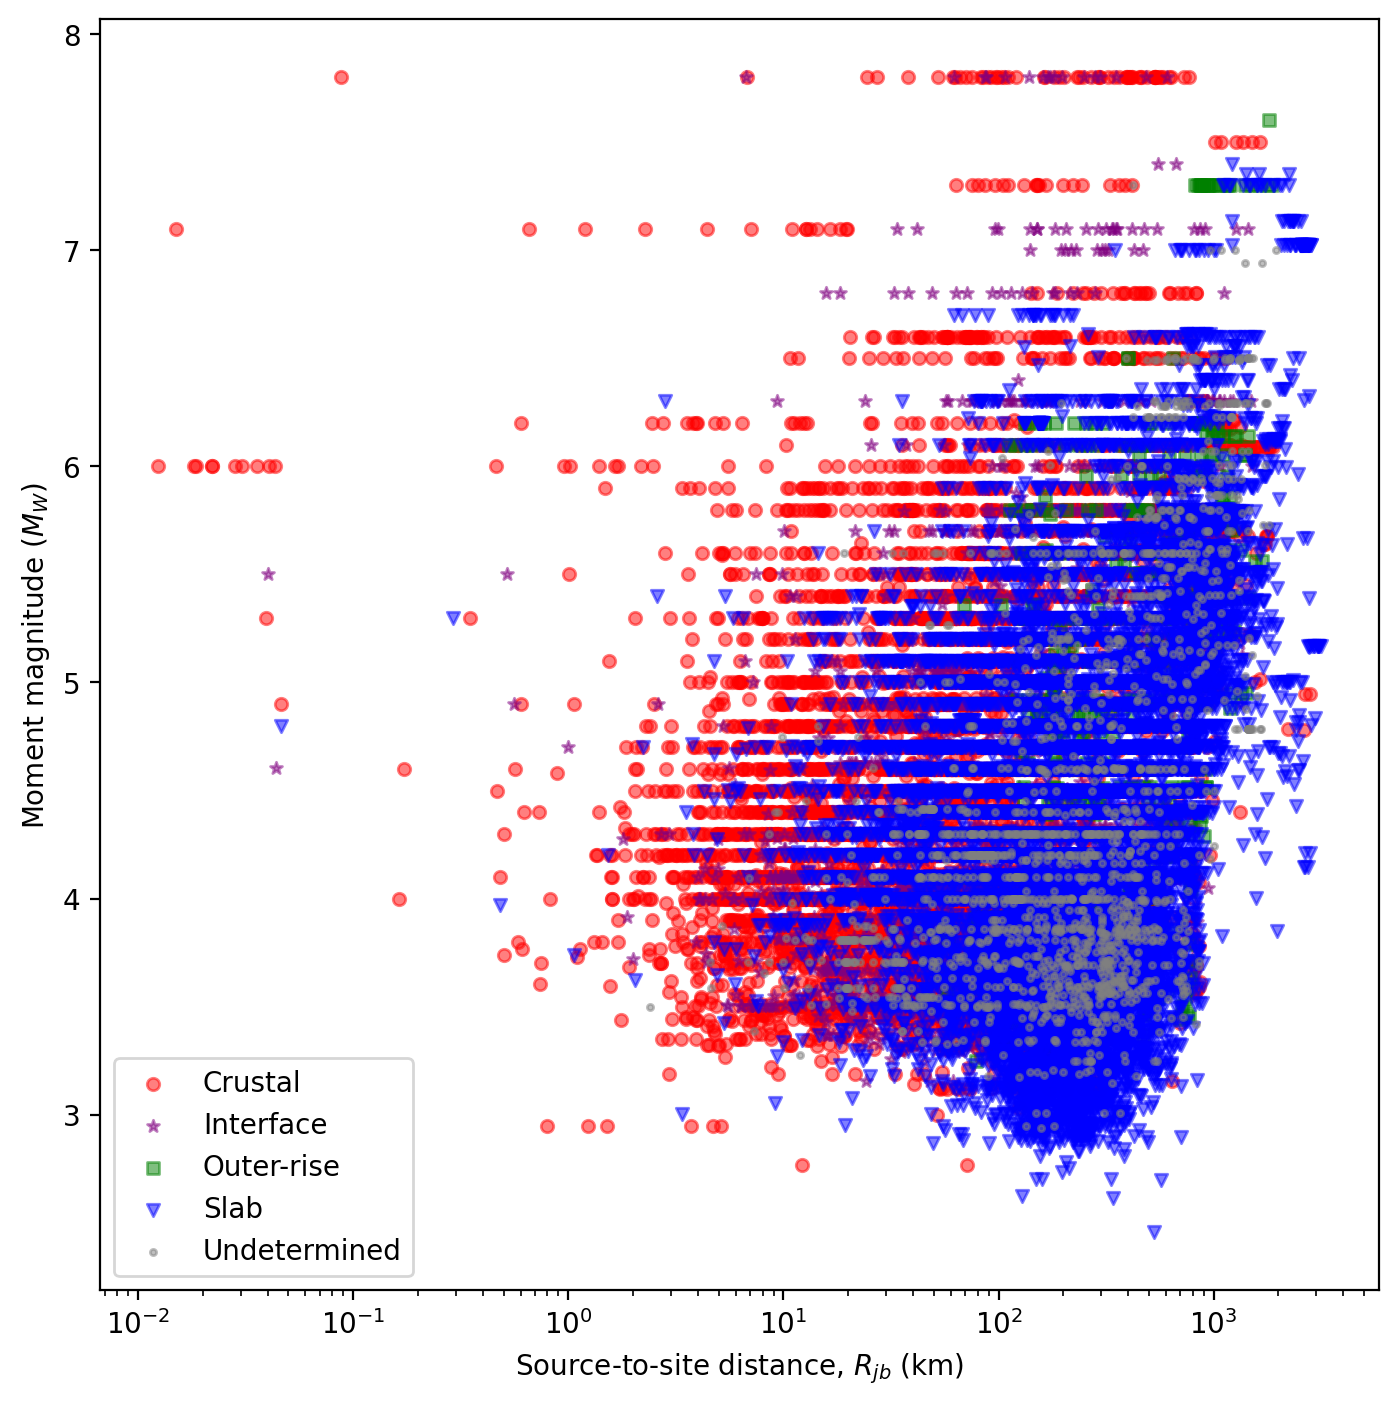

In [54]:
gm_data = pd.read_csv('Tables/ground_motion_im_table_ver_flat.csv',low_memory=False)
gm_data = gm_data[gm_data.tect_class.isnull() == False]

# import seaborn as sns
# sns.scatterplot('r_epi','mag',data=gm_data,hue='tect_class')
# plt.show()

from matplotlib import colors
# gm_data['tect_class'] = gm_data.tect_class.astype(dtype='category')
colors = {'Slab':'blue','Undetermined':'grey', 'Crustal':'red', 'Outer-rise':'green', 'Interface':'purple'}
markers = {'Slab':'v', 'Undetermined':'.', 'Crustal':'o', 'Outer-rise':'s', 'Interface':'*'}

# color_map = {'Slab':'blue', 'Slab-(NGA-Interface)':'darkblue', 'Undetermined':'grey', 'Crustal':'red', 'Outer-rise':'green', 'Interface':'purple'}

# colors = gm_data.tect_class.map(color_map)
# colors = {-1:'grey',0:'green',1:'blue',2:'orange',3:'purple',4:'yellow',5:'red'}
fig, ax = plt.subplots(figsize=(8.25,8.25),dpi=200)
grouped = gm_data.groupby('tect_class')
for key, group in grouped:
    group.plot(ax=ax,kind='scatter',x='r_epi',y='mag',alpha=0.5,label=key,logx=True,
               color=colors[key],marker=markers[key])
# ax.set_title('Epicentral distance from event to station vs station magnitude')
ax.set_xlabel('Source-to-site distance, epicentral (km)')
ax.set_ylabel('Moment magnitude $(M_W)$')
plt.savefig(fig_dir+'/epi_sta_mag.pdf')

fig, ax = plt.subplots(figsize=(8.25,8.25),dpi=200)
grouped = gm_data.groupby('tect_class')
for key, group in grouped:
    group.plot(ax=ax,kind='scatter',x='r_hyp',y='mag',alpha=0.5,label=key,logx=True,
               color=colors[key],marker=markers[key])
ax.set_xlabel('Source-to-site distance, hypocentral (km)')
ax.set_ylabel('Moment magnitude $(M_W)$')
# ax.set_title('Hypocentral distance from event to station vs magnitude')
plt.savefig(fig_dir+'/hyp_sta_mag.pdf')

fig, ax = plt.subplots(figsize=(8.25,8.25),dpi=200)
grouped = gm_data.groupby('tect_class')
for key, group in grouped:
    group.plot(ax=ax,kind='scatter',x='r_rup',y='mag',alpha=0.5,label=key,logx=True,
               color=colors[key],marker=markers[key])
# ax.set_title('Rrup distance from event to station vs magnitude')
ax.set_xlabel('Source-to-site distance, $R_{rup}$ (km)')
ax.set_ylabel('Moment magnitude $(M_W)$')
plt.savefig(fig_dir+'/rrup_mag.pdf')

fig, ax = plt.subplots(figsize=(8.25,8.25),dpi=200)
grouped = gm_data.groupby('tect_class')
for key, group in grouped:
    group.plot(ax=ax,kind='scatter',x='r_jb',y='mag',alpha=0.5,label=key,logx=True,
               color=colors[key],marker=markers[key])
# ax.set_title('Rjb distance from event to station vs magnitude')
ax.set_xlabel('Source-to-site distance, $R_{jb}$ (km)')
ax.set_ylabel('Moment magnitude $(M_W)$')
plt.savefig(fig_dir+'/rjb_mag.pdf')



In [55]:
from matplotlib import colors
# gm_data['tect_type'] = gm_data.tect_type.astype(dtype='category')
# gm_data.tect_type.cat.codes.unique()
# gm_data[gm_data.tect_type.isnull()]
gm_data.columns
key
# colors = {'Slab':'', 'Slab-(NGA-Interface)', 'Undetermined', 'Crustal',
#        'Outer-rise', 'Interface', nan}

'Undetermined'

In [ ]:
mag_data

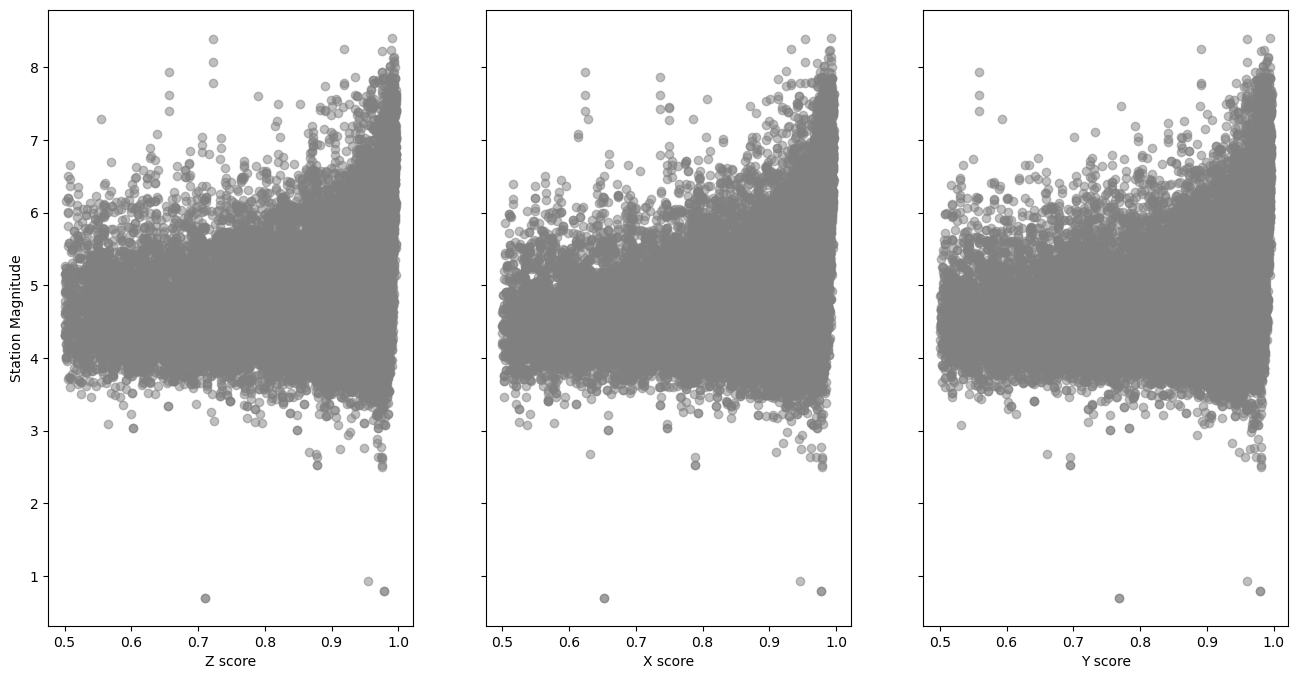

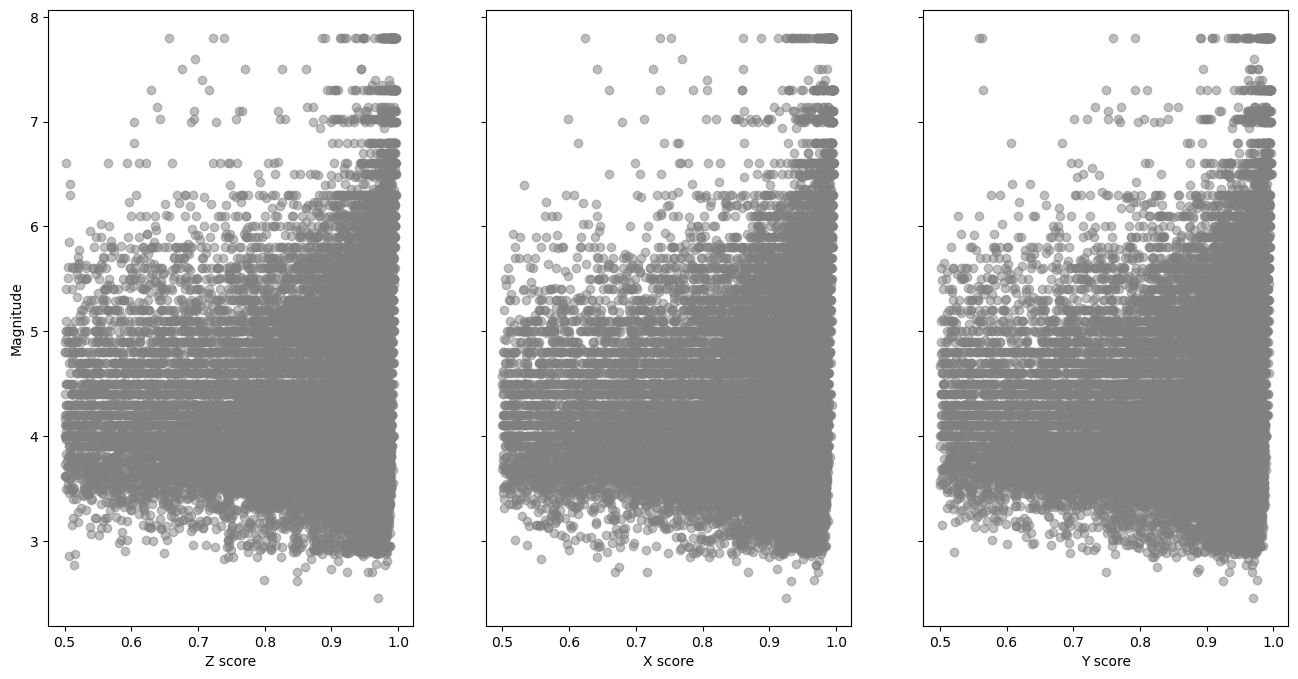

In [56]:
gm_data_z = pd.read_csv('Tables/ground_motion_im_table_ver_flat.csv',low_memory=False)
gm_data_z = gm_data_z[gm_data_z.score_mean_Z <= 2]
gm_data_x = pd.read_csv('Tables/ground_motion_im_table_090_flat.csv',low_memory=False)
gm_data_x = gm_data_x[gm_data_x.score_mean_X <= 2]
gm_data_y = pd.read_csv('Tables/ground_motion_im_table_000_flat.csv',low_memory=False)
gm_data_y = gm_data_y[gm_data_y.score_mean_Y <= 2]

f, axs = plt.subplots(1, 3,figsize=(16,8),sharey=True)
merged_data = gm_data_z.set_index(gm_data_z['evid'].astype('str')+gm_data_z['sta'].astype('str')).merge(mag_data.set_index(mag_data['evid'].astype('str')+mag_data['sta'].astype('str'))['mag'],left_index=True,right_index=True,suffixes=('_gm','_sta')).reset_index(drop=True)
axs[0].scatter(merged_data['score_mean_Z'],merged_data['mag_sta'],c='grey',alpha=0.5)
axs[0].set_xlabel('Z score')

merged_data = gm_data_x.set_index(gm_data_x['evid'].astype('str')+gm_data_x['sta'].astype('str')).merge(mag_data.set_index(mag_data['evid'].astype('str')+mag_data['sta'].astype('str'))['mag'],left_index=True,right_index=True,suffixes=('_gm','_sta')).reset_index(drop=True)
axs[1].scatter(merged_data['score_mean_X'],merged_data['mag_sta'],c='grey',alpha=0.5)
axs[1].set_xlabel('X score')

merged_data = gm_data_y.set_index(gm_data_y['evid'].astype('str')+gm_data_y['sta'].astype('str')).merge(mag_data.set_index(mag_data['evid'].astype('str')+mag_data['sta'].astype('str'))['mag'],left_index=True,right_index=True,suffixes=('_gm','_sta')).reset_index(drop=True)
axs[2].scatter(merged_data['score_mean_Y'],merged_data['mag_sta'],c='grey',alpha=0.5)
axs[2].set_xlabel('Y score')

for ax in axs.flat:
    ax.set(ylabel='Station Magnitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig(fig_dir+'/score_sta_mag.pdf')
plt.show()


f, axs = plt.subplots(1, 3,figsize=(16,8),sharey=True)
axs[0].scatter(gm_data_z['score_mean_Z'],gm_data_z['mag'],c='grey',alpha=0.5)
axs[0].set_xlabel('Z score')

axs[1].scatter(gm_data_x['score_mean_X'],gm_data_x['mag'],c='grey',alpha=0.5)
axs[1].set_xlabel('X score')

axs[2].scatter(gm_data_y['score_mean_Y'],gm_data_y['mag'],c='grey',alpha=0.5)
axs[2].set_xlabel('Y score')

for ax in axs.flat:
    ax.set(ylabel='Magnitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig(fig_dir+'/score_mag.pdf')
plt.show()
# ax = gm_data_z.plot.scatter('score_Z','mag',figsize=(8.25,8.25),c='grey',alpha=0.5)
# ax.set_xlabel('Z score')
# ax.set_ylabel('Magnitude')
# ax.set_title('Z score vs magnitude')
# plt.savefig(fig_dir+'/score_z_mag.png')

# ax = gm_data_x.plot.scatter('score_X','mag',figsize=(8.25,8.25),c='grey',alpha=0.5)
# ax.set_xlabel('X score')
# ax.set_ylabel('Magnitude')
# ax.set_title('X score vs magnitude')
# plt.savefig(fig_dir+'/score_x_mag.png')

# ax = gm_data_y.plot.scatter('score_Y','mag',figsize=(8.25,8.25),c='grey',alpha=0.5)
# ax.set_xlabel('Y score')
# ax.set_ylabel('Magnitude')
# ax.set_title('Y score vs magnitude')
# plt.savefig(fig_dir+'/score_y_mag.png')


In [57]:
data[data.mag_type == 'Mw']

evid                         datetime        lat         lon  \
5         1502698 2000-03-29 14:30:58.945000+00:00 -41.060730  175.434010   
9         1597193 2000-08-08 10:31:19.555000+00:00 -39.156280  176.280320   
22        1793707 2001-09-24 04:49:57.439999+00:00 -40.328500  176.619667   
30        1803016 2001-10-15 03:49:37.710000+00:00 -39.660333  176.641500   
34        1737299 2001-05-24 18:07:57.240000+00:00 -38.688167  175.016833   
...           ...                              ...        ...         ...   
5415  2022p969823 2022-12-25 20:03:04.302776+00:00 -39.627100  175.084100   
5417  2022p973340 2022-12-27 03:15:49.330605+00:00 -43.587900  172.133300   
5418  2022p482789 2022-06-28 15:10:00.978193+00:00 -45.053500  167.410500   
5420  2022p841456 2022-11-08 08:08:10.630254+00:00 -37.047600  177.670100   
5423  2022p983931 2022-12-31 01:18:53.955789+00:00 -40.560000  173.413100   

         depth loc_type loc_grid  mag mag_type   mag_method  ...  domain_no  \
5      30.7174    GROPE    nz1dr  5.2       Mw  uncorrected  ...          7   
9      49.9789    GROPE    nz1dr  5.3       Mw  uncorrected  ...          5   
22     27.5400    GROPE    nz1dr  5.3       Mw  uncorrected  ...          7   
30     28.0600    GROPE    nz1dr  5.5       Mw  uncorrected  ...          7   
34    249.3100    GROPE    nz1dr  5.4       Mw  uncorrected  ...          3   
...        ...      ...      ...  ...      ...          ...  ...        ...   
5415   78.0000      CMT      CMT  4.0       Mw          CMT  ...         12   
5417    3.0000      CMT      CMT  3.5       Mw          CMT  ...         17   
5418   74.0000      CMT      CMT  4.1       Mw          CMT  ...         23   
5420   68.0000      CMT      CMT  4.2       Mw          CMT  ...          4   
5423  120.0000      CMT      CMT  4.0       Mw          CMT  ...         13   

        domain_type strike   dip   rake  f_length   f_width   f_type  \
5     Contractional  220.0  40.0   97.0  3.981072  4.246196   domain   
9       Strike-slip  210.0  80.0 -134.0  4.466836  4.655861   domain   
22    Contractional  220.0  40.0   97.0  4.466836  4.655861   domain   
30    Contractional  220.0  40.0   97.0  7.744380  7.744380   domain   
34      Extensional  210.0  60.0 -127.0  5.011872  5.105050   domain   
...             ...    ...   ...    ...       ...       ...      ...   
5415  Contractional   55.0  63.0  166.0  0.790716  1.116863  cmt_unc   
5417  Contractional   55.0  75.0  133.0  0.562341  0.887156  cmt_unc   
5418  Crustal block   29.0  43.0   64.0  1.122018  1.541700  cmt_unc   
5420    Extensional  151.0  70.0  -11.0  1.042309  1.342765  cmt_unc   
5423  Contractional   17.0  57.0   36.0  0.790716  1.116863  cmt_unc   

           z_tor       z_bor  
5      29.352699   32.082101  
9      47.686336   52.271464  
22     26.043635   29.036365  
30     25.571004   30.548996  
34    247.099449  251.520551  
...          ...         ...  
5415   77.502434   78.497566  
5417    2.571537    3.428463  
5418   73.474281   74.525719  
5420   67.369107   68.630893  
5423  119.531660  120.468340  

[1898 rows x 31 columns]